<img  src='./imagens/PNG/Logo (2).png'>

# Telecomunicações Novexus   

#### Boas-vindas ao Challenge Dados 3ª Edição!   
Você é a pessoa contratada como cientista de dados pela operadora de telecomunicações Novexus. Na reunião inicial com as pessoas responsáveis pela área de vendas da empresa, foi explicada a importância de reduzir a Taxa de Evasão de Clientes, também conhecida como Churn Rate.

Com base em sua experiência, você sugere como um passo inicial a identificação de clientes que teriam uma maior chance de deixar a Novexus. Por conta disso, todo o time percebe o quanto será interessante investigar algumas características de clientes ou dos planos de clientes para tentar CLASSIFICAR essas pessoas como potenciais candidatas a deixar a empresa ou não.

Neste desafio, você terá a oportunidade de explorar, tratar e modelar dados em busca de insights valiosos. Vamos focar na otimização e disponibilização do modelo para alcançar o melhor resultado possível na tomada de decisões estratégicas da Novexus. Além disso, temos uma tarefa especial para você: desenvolver um APP Web que facilite a classificação de potenciais clientes, tornando todo o processo mais ágil e eficiente.


# Bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import plotly
import plotly.express as px
import sweetviz as sv

In [30]:
print(pd.__version__)
print(np.__version__)
print(matplotlib.__version__)
print(sns.__version__)
print(plotly.__version__)
print(sv.__version__)

2.0.3
1.25.2
3.7.1
0.12.2
5.9.0
2.2.1


In [7]:
pd.set_option('display.max_columns', 100)
# sns.set(style='darkgrid')

## Paleta de Cores

<img  src='./imagens/PNG/Paleta.png'>

In [4]:
PRETO, ROXO, LARANJA, VERMELHO = '#171821', '#872b95', '#ff7131', '#fe3d67'
paleta = ['#171821', '#872b95', '#ff7131', '#fe3d67']

# Base de dados

In [5]:
url = 'https://challenge-data-science-3ed.s3.amazonaws.com/Telco-Customer-Churn.json'

In [6]:
dados = pd.read_json(url)
dados

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [7]:
customerID = dados['customerID']
customer = pd.json_normalize(data=dados['customer'])
phone = pd.json_normalize(data=dados['phone'])
internet = pd.json_normalize(data=dados['internet'])
account = pd.json_normalize(data=dados['account'])
churn = dados['Churn']

In [8]:
dados = pd.concat([customerID, customer, phone, internet, account, churn], axis=1)

In [9]:
dados.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4,Yes


#### Dicionario de dados

* `customerID`: número de identificação unico de cada cliente
* `Churn`: se o cliente deixou ou não a empresa 
* `gender`: gênero (masculino e feminino) 
* `SeniorCitizen`: informação sobre um cliente ter ou não idade igual ou maior que 65 anos 
* `Partner`:  se o cliente possui ou não um parceiro ou parceira
* `Dependents`: se o cliente possui ou não dependentes
* `tenure`:  meses de contrato do cliente
* `PhoneService`: assinatura de serviço telefonico 
* `MultipleLines`: assisnatura de mais de uma linha de telefone 
* `InternetService`: assinatura de um provedor internet 
* `OnlineSecurity`: assinatura adicional de segurança online 
* `OnlineBackup`: assinatura adicional de backup online 
* `DeviceProtection`: assinatura adicional de proteção no dispositivo 
* `TechSupport`: assinatura adicional de suporte técnico, menos tempo de espera
* `StreamingTV`: assinatura de TV a cabo 
* `StreamingMovies`: assinatura de streaming de filmes 
* `Contract`: tipo de contrato
* `PaperlessBilling`: se o cliente prefere receber online a fatura
* `PaymentMethod`: forma de pagamento
* `Charges.Monthly`: total de todos os serviços do cliente por mãos
* `Charges.Total`: total gasto pelo cliente

# Análise Exploratória Inicial dos Dados

In [10]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   gender            7267 non-null   object 
 2   SeniorCitizen     7267 non-null   int64  
 3   Partner           7267 non-null   object 
 4   Dependents        7267 non-null   object 
 5   tenure            7267 non-null   int64  
 6   PhoneService      7267 non-null   object 
 7   MultipleLines     7267 non-null   object 
 8   InternetService   7267 non-null   object 
 9   OnlineSecurity    7267 non-null   object 
 10  OnlineBackup      7267 non-null   object 
 11  DeviceProtection  7267 non-null   object 
 12  TechSupport       7267 non-null   object 
 13  StreamingTV       7267 non-null   object 
 14  StreamingMovies   7267 non-null   object 
 15  Contract          7267 non-null   object 
 16  PaperlessBilling  7267 non-null   object 


In [11]:
dados.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7267.0,0.162653,0.369074,0.00,0.000,0.0,0.000,1.00
tenure,7267.0,32.346498,24.571773,0.00,9.000,29.0,55.000,72.00
Charges.Monthly,7267.0,64.720098,30.129572,18.25,35.425,70.3,89.875,118.75


In [12]:
dados.nunique()

customerID          7267
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
Charges.Monthly     1585
Charges.Total       6531
Churn                  3
dtype: int64

In [13]:
dados.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
Churn               0
dtype: int64

In [14]:
# my_report = sv.analyze(dados)
# my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"

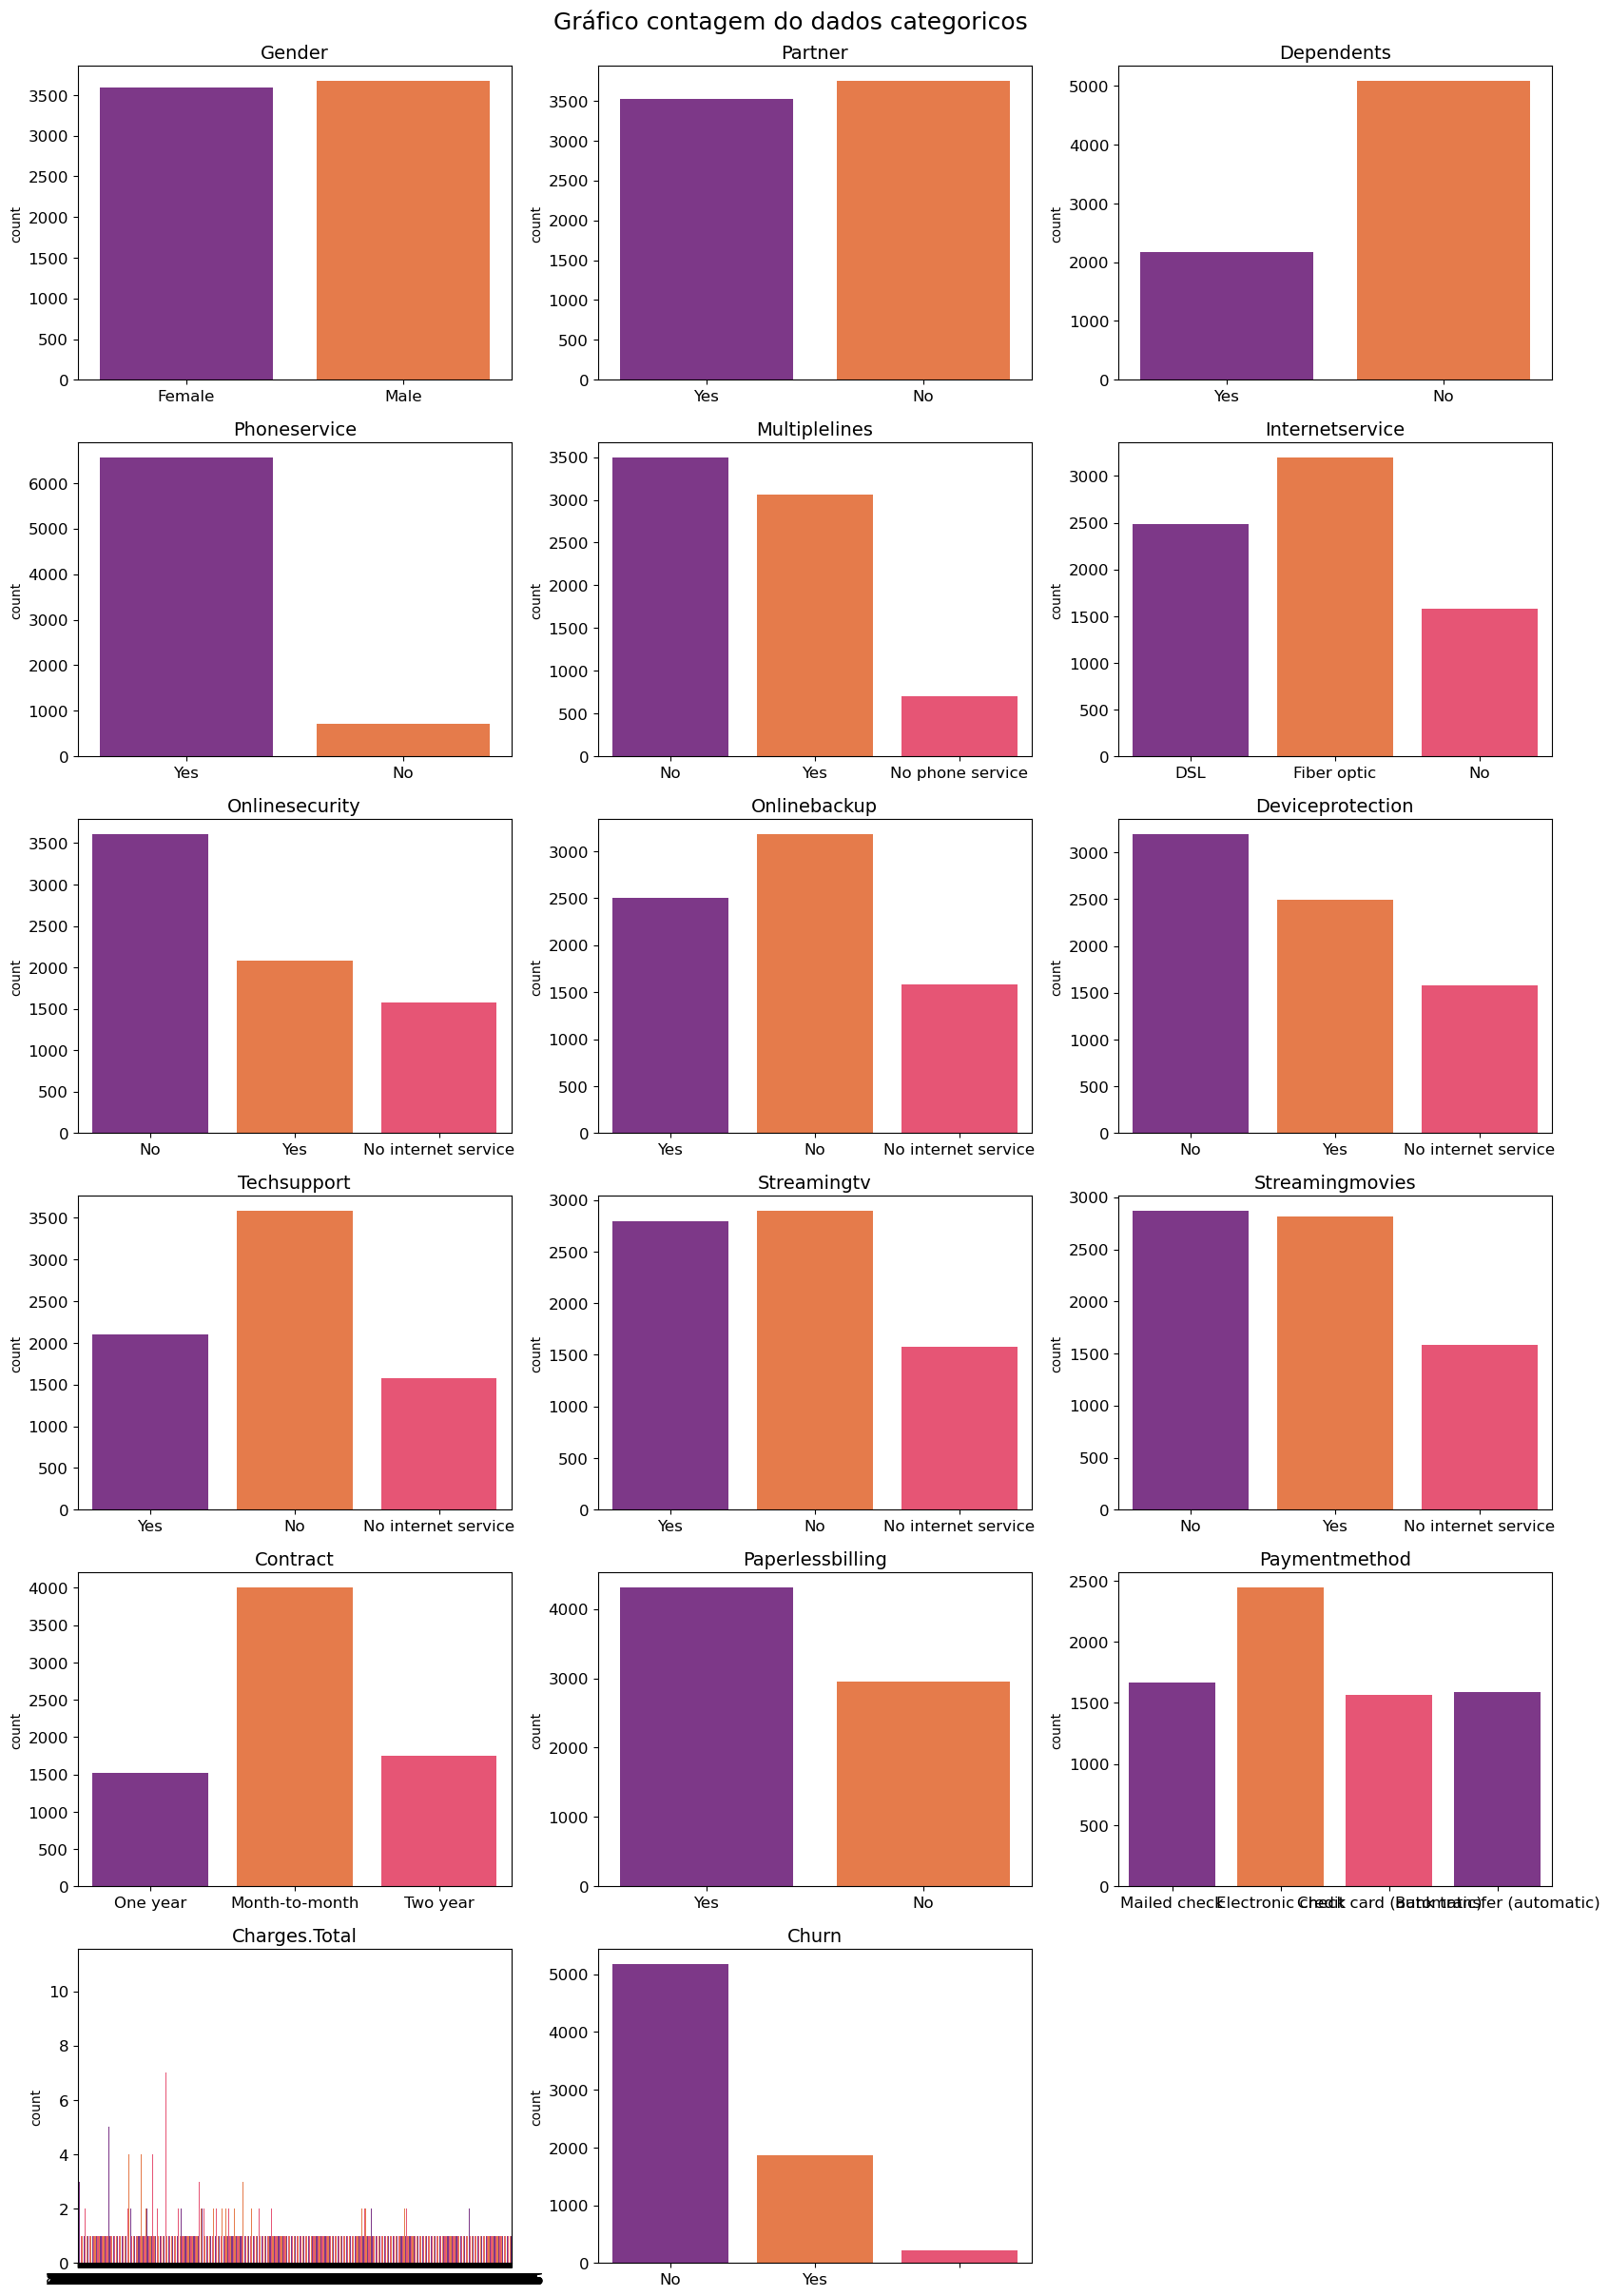

In [15]:
colunas_objeto = dados.select_dtypes(include='object').columns

plt.figure(figsize=(20,30))
plt.suptitle('Gráfico contagem do dados categoricos', y=0.9, fontsize=18)
for i, col in enumerate(colunas_objeto[1:], start=1):
    plt.subplot(6,3,i)
    sns.countplot(x=dados[col], palette=[ROXO, LARANJA, VERMELHO])
    plt.title(f'{col}'.title(), fontsize=14)
    plt.xlabel('')
    plt.tick_params(labelsize=12)

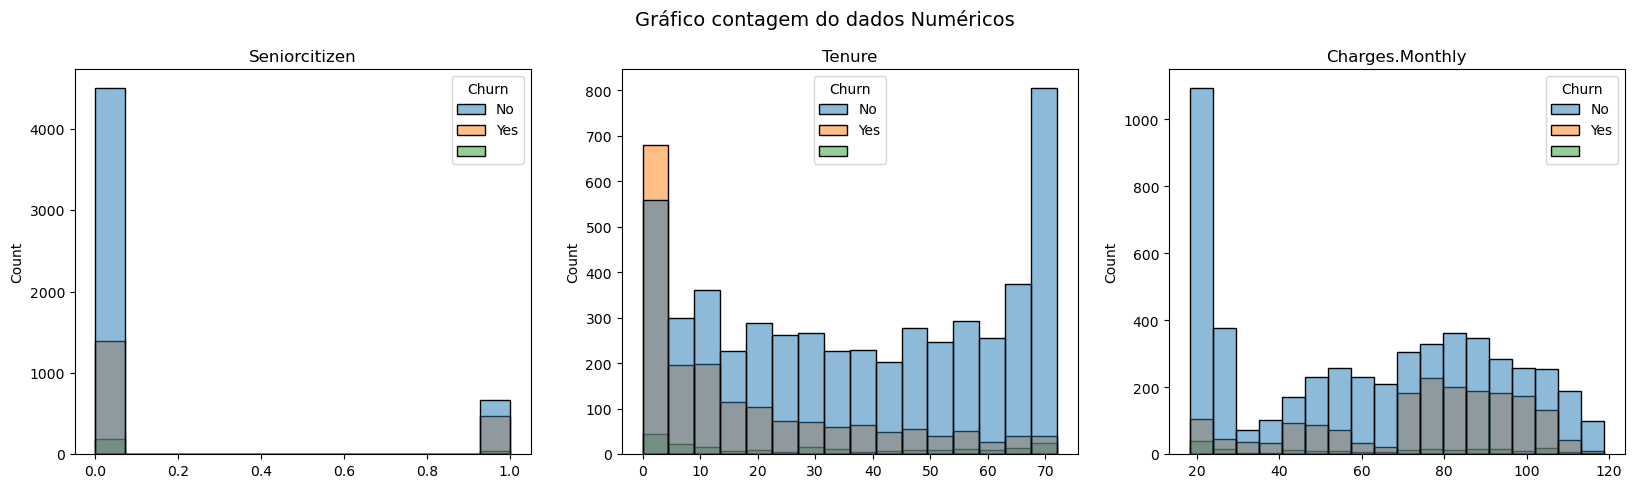

In [16]:
colunas_numericas = dados.select_dtypes(exclude='object').columns
colunas_numericas
plt.figure(figsize=(20,5))
plt.suptitle('Gráfico contagem do dados Numéricos', y=1, fontsize=14)
for i, col in enumerate(colunas_numericas, start=1):
    plt.subplot(1,3,i)
    sns.histplot(x=dados[col], hue=dados['Churn'])
    plt.title(f'{col}'.title())
    plt.xlabel('')

<Axes: >

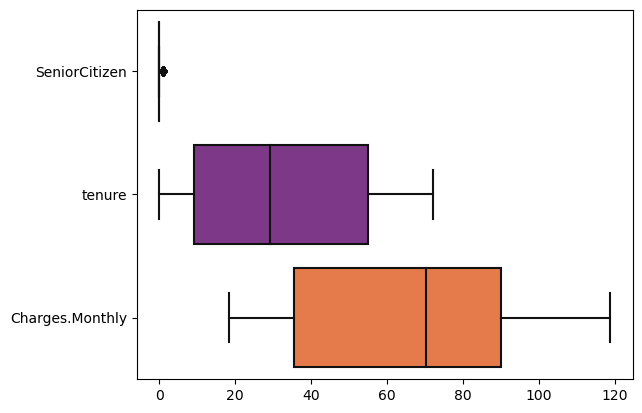

In [18]:
sns.boxplot(dados, orient='h', palette=paleta)

# Pré-Processamento do dados

### Valores Inconsistentes e Nulos

In [19]:
print('---'*20)
for col in dados.columns:
    print(dados[col].value_counts())
    print('---'*20)

------------------------------------------------------------
customerID
0002-ORFBO    1
6614-VBEGU    1
6637-KYRCV    1
6635-MYYYZ    1
6635-CPNUN    1
             ..
3374-TTZTK    1
3374-PZLXD    1
3374-LXDEV    1
3373-YZZYM    1
9995-HOTOH    1
Name: count, Length: 7267, dtype: int64
------------------------------------------------------------
gender
Male      3675
Female    3592
Name: count, dtype: int64
------------------------------------------------------------
SeniorCitizen
0    6085
1    1182
Name: count, dtype: int64
------------------------------------------------------------
Partner
No     3749
Yes    3518
Name: count, dtype: int64
------------------------------------------------------------
Dependents
No     5086
Yes    2181
Name: count, dtype: int64
------------------------------------------------------------
tenure
1     634
72    369
2     246
3     207
4     185
     ... 
38     60
39     59
44     54
36     50
0      11
Name: count, Length: 73, dtype: int64
----------

In [20]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   gender            7267 non-null   object 
 2   SeniorCitizen     7267 non-null   int64  
 3   Partner           7267 non-null   object 
 4   Dependents        7267 non-null   object 
 5   tenure            7267 non-null   int64  
 6   PhoneService      7267 non-null   object 
 7   MultipleLines     7267 non-null   object 
 8   InternetService   7267 non-null   object 
 9   OnlineSecurity    7267 non-null   object 
 10  OnlineBackup      7267 non-null   object 
 11  DeviceProtection  7267 non-null   object 
 12  TechSupport       7267 non-null   object 
 13  StreamingTV       7267 non-null   object 
 14  StreamingMovies   7267 non-null   object 
 15  Contract          7267 non-null   object 
 16  PaperlessBilling  7267 non-null   object 


In [21]:
dados.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4,Yes


In [22]:
## Coluna total, que apresenta categoria categórica

dados['Charges.Total'].value_counts()

Charges.Total
           11
20.2       11
19.75       9
19.55       9
19.9        9
           ..
272         1
1426.45     1
371.6       1
6786.4      1
3707.6      1
Name: count, Length: 6531, dtype: int64

In [23]:
dados.loc[dados['Charges.Total'] == ' ', 'Charges.Total'] = np.nan

In [24]:
dados['Charges.Total'] = dados['Charges.Total'].astype('float64')

In [25]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   gender            7267 non-null   object 
 2   SeniorCitizen     7267 non-null   int64  
 3   Partner           7267 non-null   object 
 4   Dependents        7267 non-null   object 
 5   tenure            7267 non-null   int64  
 6   PhoneService      7267 non-null   object 
 7   MultipleLines     7267 non-null   object 
 8   InternetService   7267 non-null   object 
 9   OnlineSecurity    7267 non-null   object 
 10  OnlineBackup      7267 non-null   object 
 11  DeviceProtection  7267 non-null   object 
 12  TechSupport       7267 non-null   object 
 13  StreamingTV       7267 non-null   object 
 14  StreamingMovies   7267 non-null   object 
 15  Contract          7267 non-null   object 
 16  PaperlessBilling  7267 non-null   object 


In [26]:
media_gasto_total = dados['Charges.Total'].mean()
mediana_gasto_total = dados['Charges.Total'].median()

print('Media gasto total:', media_gasto_total,'--','Mediana gasto total:', mediana_gasto_total)

Media gasto total: 2280.6342130650496 -- Mediana gasto total: 1391.0


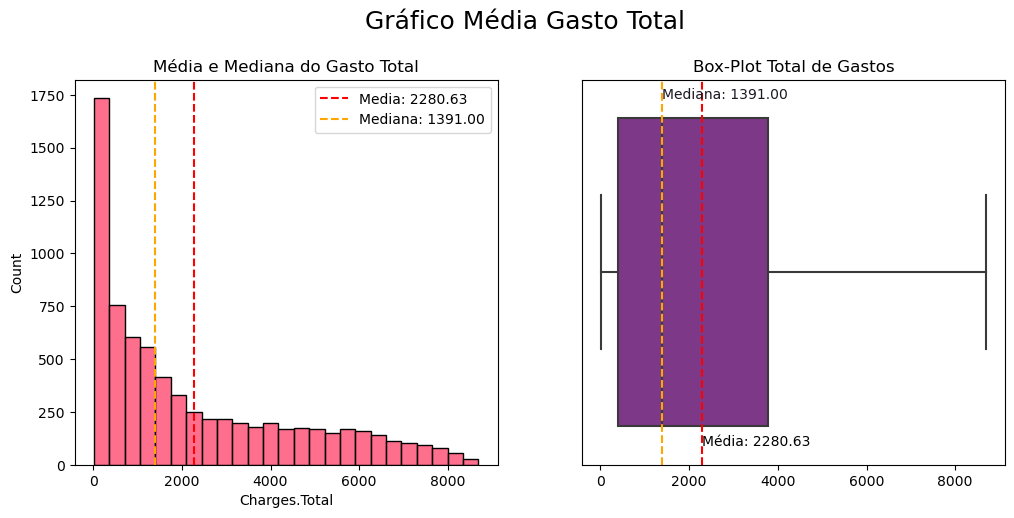

In [32]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(12,5))
fig.suptitle('Gráfico Média Gasto Total', fontsize=18, y=1.02)

sns.histplot(dados['Charges.Total'], ax=ax[0], color=VERMELHO)
ax[0].set_title('Média e Mediana do Gasto Total')
ax[0].axvline(x=media_gasto_total, ls='--', color='red')
# ax[0].text(x=media_gasto_total, y=1500, s=f'Média: {media_gasto_total:.2f}')
ax[0].axvline(x=mediana_gasto_total, ls='--', color='orange')
# ax[0].text(x=mediana_gasto_total, y=1700, s=f'Mediana: {mediana_gasto_total:.2f}')
ax[0].legend([f'Media: {media_gasto_total:.2f}', f'Mediana: {mediana_gasto_total:.2f}'])

sns.boxplot(dados['Charges.Total'], ax=ax[1], orient='h', color=paleta[1], zorder=1)
ax[1].set_title('Box-Plot Total de Gastos')
ax[1].set_yticks([])
ax[1].axvline(x=media_gasto_total, ls='--', color='red')
ax[1].text(x=media_gasto_total, y=0.45, s=f'Média: {media_gasto_total:.2f}')
ax[1].axvline(x=mediana_gasto_total, ls='--', color='orange')
ax[1].text(x=mediana_gasto_total, y=-0.45, s=f'Mediana: {mediana_gasto_total:.2f}', c=paleta[0])
# ax[1].legend([f'Media: {media_gasto_total:.2f}', f'Mediana: {mediana_gasto_total:.2f}'], shadow=False, framealpha=0.8)

fig.savefig('./imagens/medida_coluna_total_gastos_novexus.png')
plt.show()

In [33]:
dados.fillna(mediana_gasto_total, inplace=True)

In [34]:
dados['Charges.Total'].isnull().sum()

0

##### Coluna Churn

In [35]:
dados.Churn.value_counts()

Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64

In [36]:
dados.loc[dados.Churn == '', 'Churn'] = np.nan

In [37]:
dados['Churn'].isnull().sum()

224

In [38]:
# Vamos armazenar esses dados com o Churn nulo para podermos joga-los ao algoritmo de machine learning para prever esses dados

churn_nulos = dados.loc[dados.Churn.isnull()]
churn_nulos

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Churn
30,0047-ZHDTW,Female,0,No,No,11,Yes,Yes,Fiber optic,Yes,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),79.00,929.30,NaN
75,0120-YZLQA,Male,0,No,No,71,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.90,1355.10,NaN
96,0154-QYHJU,Male,0,No,No,29,Yes,No,DSL,Yes,Yes,No,Yes,No,No,One year,Yes,Electronic check,58.75,1696.20,NaN
98,0162-RZGMZ,Female,1,No,No,5,Yes,No,DSL,Yes,Yes,No,Yes,No,No,Month-to-month,No,Credit card (automatic),59.90,287.85,NaN
175,0274-VVQOQ,Male,1,Yes,No,65,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),103.15,6792.45,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7158,9840-GSRFX,Female,0,No,No,14,Yes,Yes,DSL,No,Yes,No,No,No,No,One year,Yes,Mailed check,54.25,773.20,NaN
7180,9872-RZQQB,Female,0,Yes,No,49,No,No phone service,DSL,Yes,No,No,No,Yes,No,Month-to-month,No,Bank transfer (automatic),40.65,2070.75,NaN
7211,9920-GNDMB,Male,0,No,No,9,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,76.25,684.85,NaN
7239,9955-RVWSC,Female,0,Yes,Yes,67,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),19.25,1372.90,NaN


In [39]:
dados.dropna(axis=0, inplace=True)

In [40]:
dados.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
Churn               0
dtype: int64

### Dados Duplicados

In [41]:
dados.duplicated().sum()

0

### Codificação de Variáveis Categóricas

In [42]:
colunas_categoricas = dados.select_dtypes(include='object').columns
colunas_categoricas

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [43]:
for col in colunas_categoricas[1:]:
    print('--'*20)
    print(dados[col].value_counts())

----------------------------------------
gender
Male      3555
Female    3488
Name: count, dtype: int64
----------------------------------------
Partner
No     3641
Yes    3402
Name: count, dtype: int64
----------------------------------------
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
----------------------------------------
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
----------------------------------------
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
----------------------------------------
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
----------------------------------------
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64
----------------------------------------
OnlineBackup
No                     3088
Yes                    2429
No internet serv

In [44]:
for col in colunas_categoricas[5:13]:
    print('--'*20)
    valores_a_troca = dados[col].value_counts().index[2]
    dados[col] = dados[col].replace(valores_a_troca, 'No')
    print(dados[col].replace(valores_a_troca, 'No').value_counts())

----------------------------------------
MultipleLines
No     4072
Yes    2971
Name: count, dtype: int64
----------------------------------------
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
----------------------------------------
OnlineSecurity
No     5024
Yes    2019
Name: count, dtype: int64
----------------------------------------
OnlineBackup
No     4614
Yes    2429
Name: count, dtype: int64
----------------------------------------
DeviceProtection
No     4621
Yes    2422
Name: count, dtype: int64
----------------------------------------
TechSupport
No     4999
Yes    2044
Name: count, dtype: int64
----------------------------------------
StreamingTV
No     4336
Yes    2707
Name: count, dtype: int64
----------------------------------------
StreamingMovies
No     4311
Yes    2732
Name: count, dtype: int64


In [45]:
dados.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,Yes


### Normalização de Texto 

#### Dicionario de dados

* `customerID`: número de identificação unico de cada cliente
* `Churn`: se o cliente deixou ou não a empresa 
* `gender`: gênero (masculino e feminino) 
* `SeniorCitizen`: informação sobre um cliente ter ou não idade igual ou maior que 65 anos 
* `Partner`:  se o cliente possui ou não um parceiro ou parceira
* `Dependents`: se o cliente possui ou não dependentes
* `tenure`:  meses de contrato do cliente
* `PhoneService`: assinatura de serviço telefonico 
* `MultipleLines`: assisnatura de mais de uma linha de telefone 
* `InternetService`: assinatura de um provedor internet 
* `OnlineSecurity`: assinatura adicional de segurança online 
* `OnlineBackup`: assinatura adicional de backup online 
* `DeviceProtection`: assinatura adicional de proteção no dispositivo 
* `TechSupport`: assinatura adicional de suporte técnico, menos tempo de espera
* `StreamingTV`: assinatura de TV a cabo 
* `StreamingMovies`: assinatura de streaming de filmes 
* `Contract`: tipo de contrato
* `PaperlessBilling`: se o cliente prefere receber online a fatura
* `PaymentMethod`: forma de pagamento
* `Charges.Monthly`: total de todos os serviços do cliente por mãos
* `Charges.Total`: total gasto pelo cliente

#### Colunas

In [46]:
colunas_traduzidas = ['ID', 'genero', 'idoso', 'conjuge', 'dependentes', 'contrato_ativo',
                      'servico_telefone','mult_linhas','servico_internet','seguranca_online',
                      'backup_online','protecao_disp','suporte_tecnico','stream_TV','Stream_filmes',
                      'contrato','fatura_online','forma_pagamento','valor_mensal','valor_total','Churn']

dados.columns = colunas_traduzidas
dados.columns = dados.columns.str.title()

dados.head()

,Id,Genero,Idoso,Conjuge,Dependentes,Contrato_Ativo,Servico_Telefone,Mult_Linhas,Servico_Internet,Seguranca_Online,Backup_Online,Protecao_Disp,Suporte_Tecnico,Stream_Tv,Stream_Filmes,Contrato,Fatura_Online,Forma_Pagamento,Valor_Mensal,Valor_Total,Churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,Yes


#### Gênero

In [47]:
dados['Genero'] = dados['Genero'].replace(['Female', 'Male'], ['Feminino', 'Masculino'])
dados.head()

,Id,Genero,Idoso,Conjuge,Dependentes,Contrato_Ativo,Servico_Telefone,Mult_Linhas,Servico_Internet,Seguranca_Online,Backup_Online,Protecao_Disp,Suporte_Tecnico,Stream_Tv,Stream_Filmes,Contrato,Fatura_Online,Forma_Pagamento,Valor_Mensal,Valor_Total,Churn
0,0002-ORFBO,Feminino,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,No
1,0003-MKNFE,Masculino,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,No
2,0004-TLHLJ,Masculino,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,Yes
3,0011-IGKFF,Masculino,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,Yes
4,0013-EXCHZ,Feminino,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,Yes


#### Contrato

In [48]:
dados['Contrato'].unique()

array(['One year', 'Month-to-month', 'Two year'], dtype=object)

In [49]:
dados['Contrato'] = dados['Contrato'].replace(['One year', 'Month-to-month','Two year'], ['Anual', 'Mensal', 'Dois anos'])

In [50]:
dados['Contrato'].unique()

array(['Anual', 'Mensal', 'Dois anos'], dtype=object)

In [51]:
dados.head()

,Id,Genero,Idoso,Conjuge,Dependentes,Contrato_Ativo,Servico_Telefone,Mult_Linhas,Servico_Internet,Seguranca_Online,Backup_Online,Protecao_Disp,Suporte_Tecnico,Stream_Tv,Stream_Filmes,Contrato,Fatura_Online,Forma_Pagamento,Valor_Mensal,Valor_Total,Churn
0,0002-ORFBO,Feminino,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,Anual,Yes,Mailed check,65.6,593.30,No
1,0003-MKNFE,Masculino,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Mensal,No,Mailed check,59.9,542.40,No
2,0004-TLHLJ,Masculino,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Mensal,Yes,Electronic check,73.9,280.85,Yes
3,0011-IGKFF,Masculino,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Mensal,Yes,Electronic check,98.0,1237.85,Yes
4,0013-EXCHZ,Feminino,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Mensal,Yes,Mailed check,83.9,267.40,Yes


#### Forma de Pagamento

In [52]:
dados['Forma_Pagamento'].unique()

array(['Mailed check', 'Electronic check', 'Credit card (automatic)',
       'Bank transfer (automatic)'], dtype=object)

In [53]:
dados['Forma_Pagamento'] = dados['Forma_Pagamento'].replace(['Mailed check', 'Electronic check',
                                                             'Credit card (automatic)', 'Bank transfer (automatic)'],
                                                            ['Correio', 'Pag. Eletronico', 'Cart. Cred.', 'Transf. Aut.'])

In [54]:
dados['Forma_Pagamento'].unique()

array(['Correio', 'Pag. Eletronico', 'Cart. Cred.', 'Transf. Aut.'],
      dtype=object)

#### Serviço Internet

In [55]:
dados['Servico_Internet'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [56]:
dados['Servico_Internet'] = dados['Servico_Internet'].replace(['DSL', 'Fiber optic','No'], ['DSL', 'Fibra Otica', 'Nao'])

In [57]:
dados['Servico_Internet'].unique()

array(['DSL', 'Fibra Otica', 'Nao'], dtype=object)

In [58]:
dados.head()

,Id,Genero,Idoso,Conjuge,Dependentes,Contrato_Ativo,Servico_Telefone,Mult_Linhas,Servico_Internet,Seguranca_Online,Backup_Online,Protecao_Disp,Suporte_Tecnico,Stream_Tv,Stream_Filmes,Contrato,Fatura_Online,Forma_Pagamento,Valor_Mensal,Valor_Total,Churn
0,0002-ORFBO,Feminino,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,Anual,Yes,Correio,65.6,593.30,No
1,0003-MKNFE,Masculino,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Mensal,No,Correio,59.9,542.40,No
2,0004-TLHLJ,Masculino,0,No,No,4,Yes,No,Fibra Otica,No,No,Yes,No,No,No,Mensal,Yes,Pag. Eletronico,73.9,280.85,Yes
3,0011-IGKFF,Masculino,1,Yes,No,13,Yes,No,Fibra Otica,No,Yes,Yes,No,Yes,Yes,Mensal,Yes,Pag. Eletronico,98.0,1237.85,Yes
4,0013-EXCHZ,Feminino,1,Yes,No,3,Yes,No,Fibra Otica,No,No,No,Yes,Yes,No,Mensal,Yes,Correio,83.9,267.40,Yes


#### Colunas em Geral

In [59]:
dados = dados.replace(['Yes', 'No'], ['Sim', 'Nao'])
dados.head()

,Id,Genero,Idoso,Conjuge,Dependentes,Contrato_Ativo,Servico_Telefone,Mult_Linhas,Servico_Internet,Seguranca_Online,Backup_Online,Protecao_Disp,Suporte_Tecnico,Stream_Tv,Stream_Filmes,Contrato,Fatura_Online,Forma_Pagamento,Valor_Mensal,Valor_Total,Churn
0,0002-ORFBO,Feminino,0,Sim,Sim,9,Sim,Nao,DSL,Nao,Sim,Nao,Sim,Sim,Nao,Anual,Sim,Correio,65.6,593.30,Nao
1,0003-MKNFE,Masculino,0,Nao,Nao,9,Sim,Sim,DSL,Nao,Nao,Nao,Nao,Nao,Sim,Mensal,Nao,Correio,59.9,542.40,Nao
2,0004-TLHLJ,Masculino,0,Nao,Nao,4,Sim,Nao,Fibra Otica,Nao,Nao,Sim,Nao,Nao,Nao,Mensal,Sim,Pag. Eletronico,73.9,280.85,Sim
3,0011-IGKFF,Masculino,1,Sim,Nao,13,Sim,Nao,Fibra Otica,Nao,Sim,Sim,Nao,Sim,Sim,Mensal,Sim,Pag. Eletronico,98.0,1237.85,Sim
4,0013-EXCHZ,Feminino,1,Sim,Nao,3,Sim,Nao,Fibra Otica,Nao,Nao,Nao,Sim,Sim,Nao,Mensal,Sim,Correio,83.9,267.40,Sim


In [60]:
for col in dados.columns:
    print('--'*20)
    print(dados[col].value_counts())

----------------------------------------
Id
0002-ORFBO    1
6616-AALSR    1
6625-UTXEW    1
6625-IUTTT    1
6625-FLENO    1
             ..
3352-RICWQ    1
3352-ALMCK    1
3351-NQLDI    1
3351-NGXYI    1
9995-HOTOH    1
Name: count, Length: 7043, dtype: int64
----------------------------------------
Genero
Masculino    3555
Feminino     3488
Name: count, dtype: int64
----------------------------------------
Idoso
0    5901
1    1142
Name: count, dtype: int64
----------------------------------------
Conjuge
Nao    3641
Sim    3402
Name: count, dtype: int64
----------------------------------------
Dependentes
Nao    4933
Sim    2110
Name: count, dtype: int64
----------------------------------------
Contrato_Ativo
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64
----------------------------------------
Servico_Telefone
Sim    6361
Nao     682
Name: count, dtype: int64
-----------------------

In [61]:
dados.reset_index(inplace=True, drop=True)
dados

,Id,Genero,Idoso,Conjuge,Dependentes,Contrato_Ativo,Servico_Telefone,Mult_Linhas,Servico_Internet,Seguranca_Online,Backup_Online,Protecao_Disp,Suporte_Tecnico,Stream_Tv,Stream_Filmes,Contrato,Fatura_Online,Forma_Pagamento,Valor_Mensal,Valor_Total,Churn
0,0002-ORFBO,Feminino,0,Sim,Sim,9,Sim,Nao,DSL,Nao,Sim,Nao,Sim,Sim,Nao,Anual,Sim,Correio,65.60,593.30,Nao
1,0003-MKNFE,Masculino,0,Nao,Nao,9,Sim,Sim,DSL,Nao,Nao,Nao,Nao,Nao,Sim,Mensal,Nao,Correio,59.90,542.40,Nao
2,0004-TLHLJ,Masculino,0,Nao,Nao,4,Sim,Nao,Fibra Otica,Nao,Nao,Sim,Nao,Nao,Nao,Mensal,Sim,Pag. Eletronico,73.90,280.85,Sim
3,0011-IGKFF,Masculino,1,Sim,Nao,13,Sim,Nao,Fibra Otica,Nao,Sim,Sim,Nao,Sim,Sim,Mensal,Sim,Pag. Eletronico,98.00,1237.85,Sim
4,0013-EXCHZ,Feminino,1,Sim,Nao,3,Sim,Nao,Fibra Otica,Nao,Nao,Nao,Sim,Sim,Nao,Mensal,Sim,Correio,83.90,267.40,Sim
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Feminino,0,Nao,Nao,13,Sim,Nao,DSL,Sim,Nao,Nao,Sim,Nao,Nao,Anual,Nao,Correio,55.15,742.90,Nao
7039,9992-RRAMN,Masculino,0,Sim,Nao,22,Sim,Sim,Fibra Otica,Nao,Nao,Nao,Nao,Nao,Sim,Mensal,Sim,Pag. Eletronico,85.10,1873.70,Sim
7040,9992-UJOEL,Masculino,0,Nao,Nao,2,Sim,Nao,DSL,Nao,Sim,Nao,Nao,Nao,Nao,Mensal,Sim,Correio,50.30,92.75,Nao
7041,9993-LHIEB,Masculino,0,Sim,Sim,67,Sim,Nao,DSL,Sim,Nao,Sim,Sim,Nao,Sim,Dois anos,Nao,Correio,67.85,4627.65,Nao


## Visualização dos dados em relação ao Churn

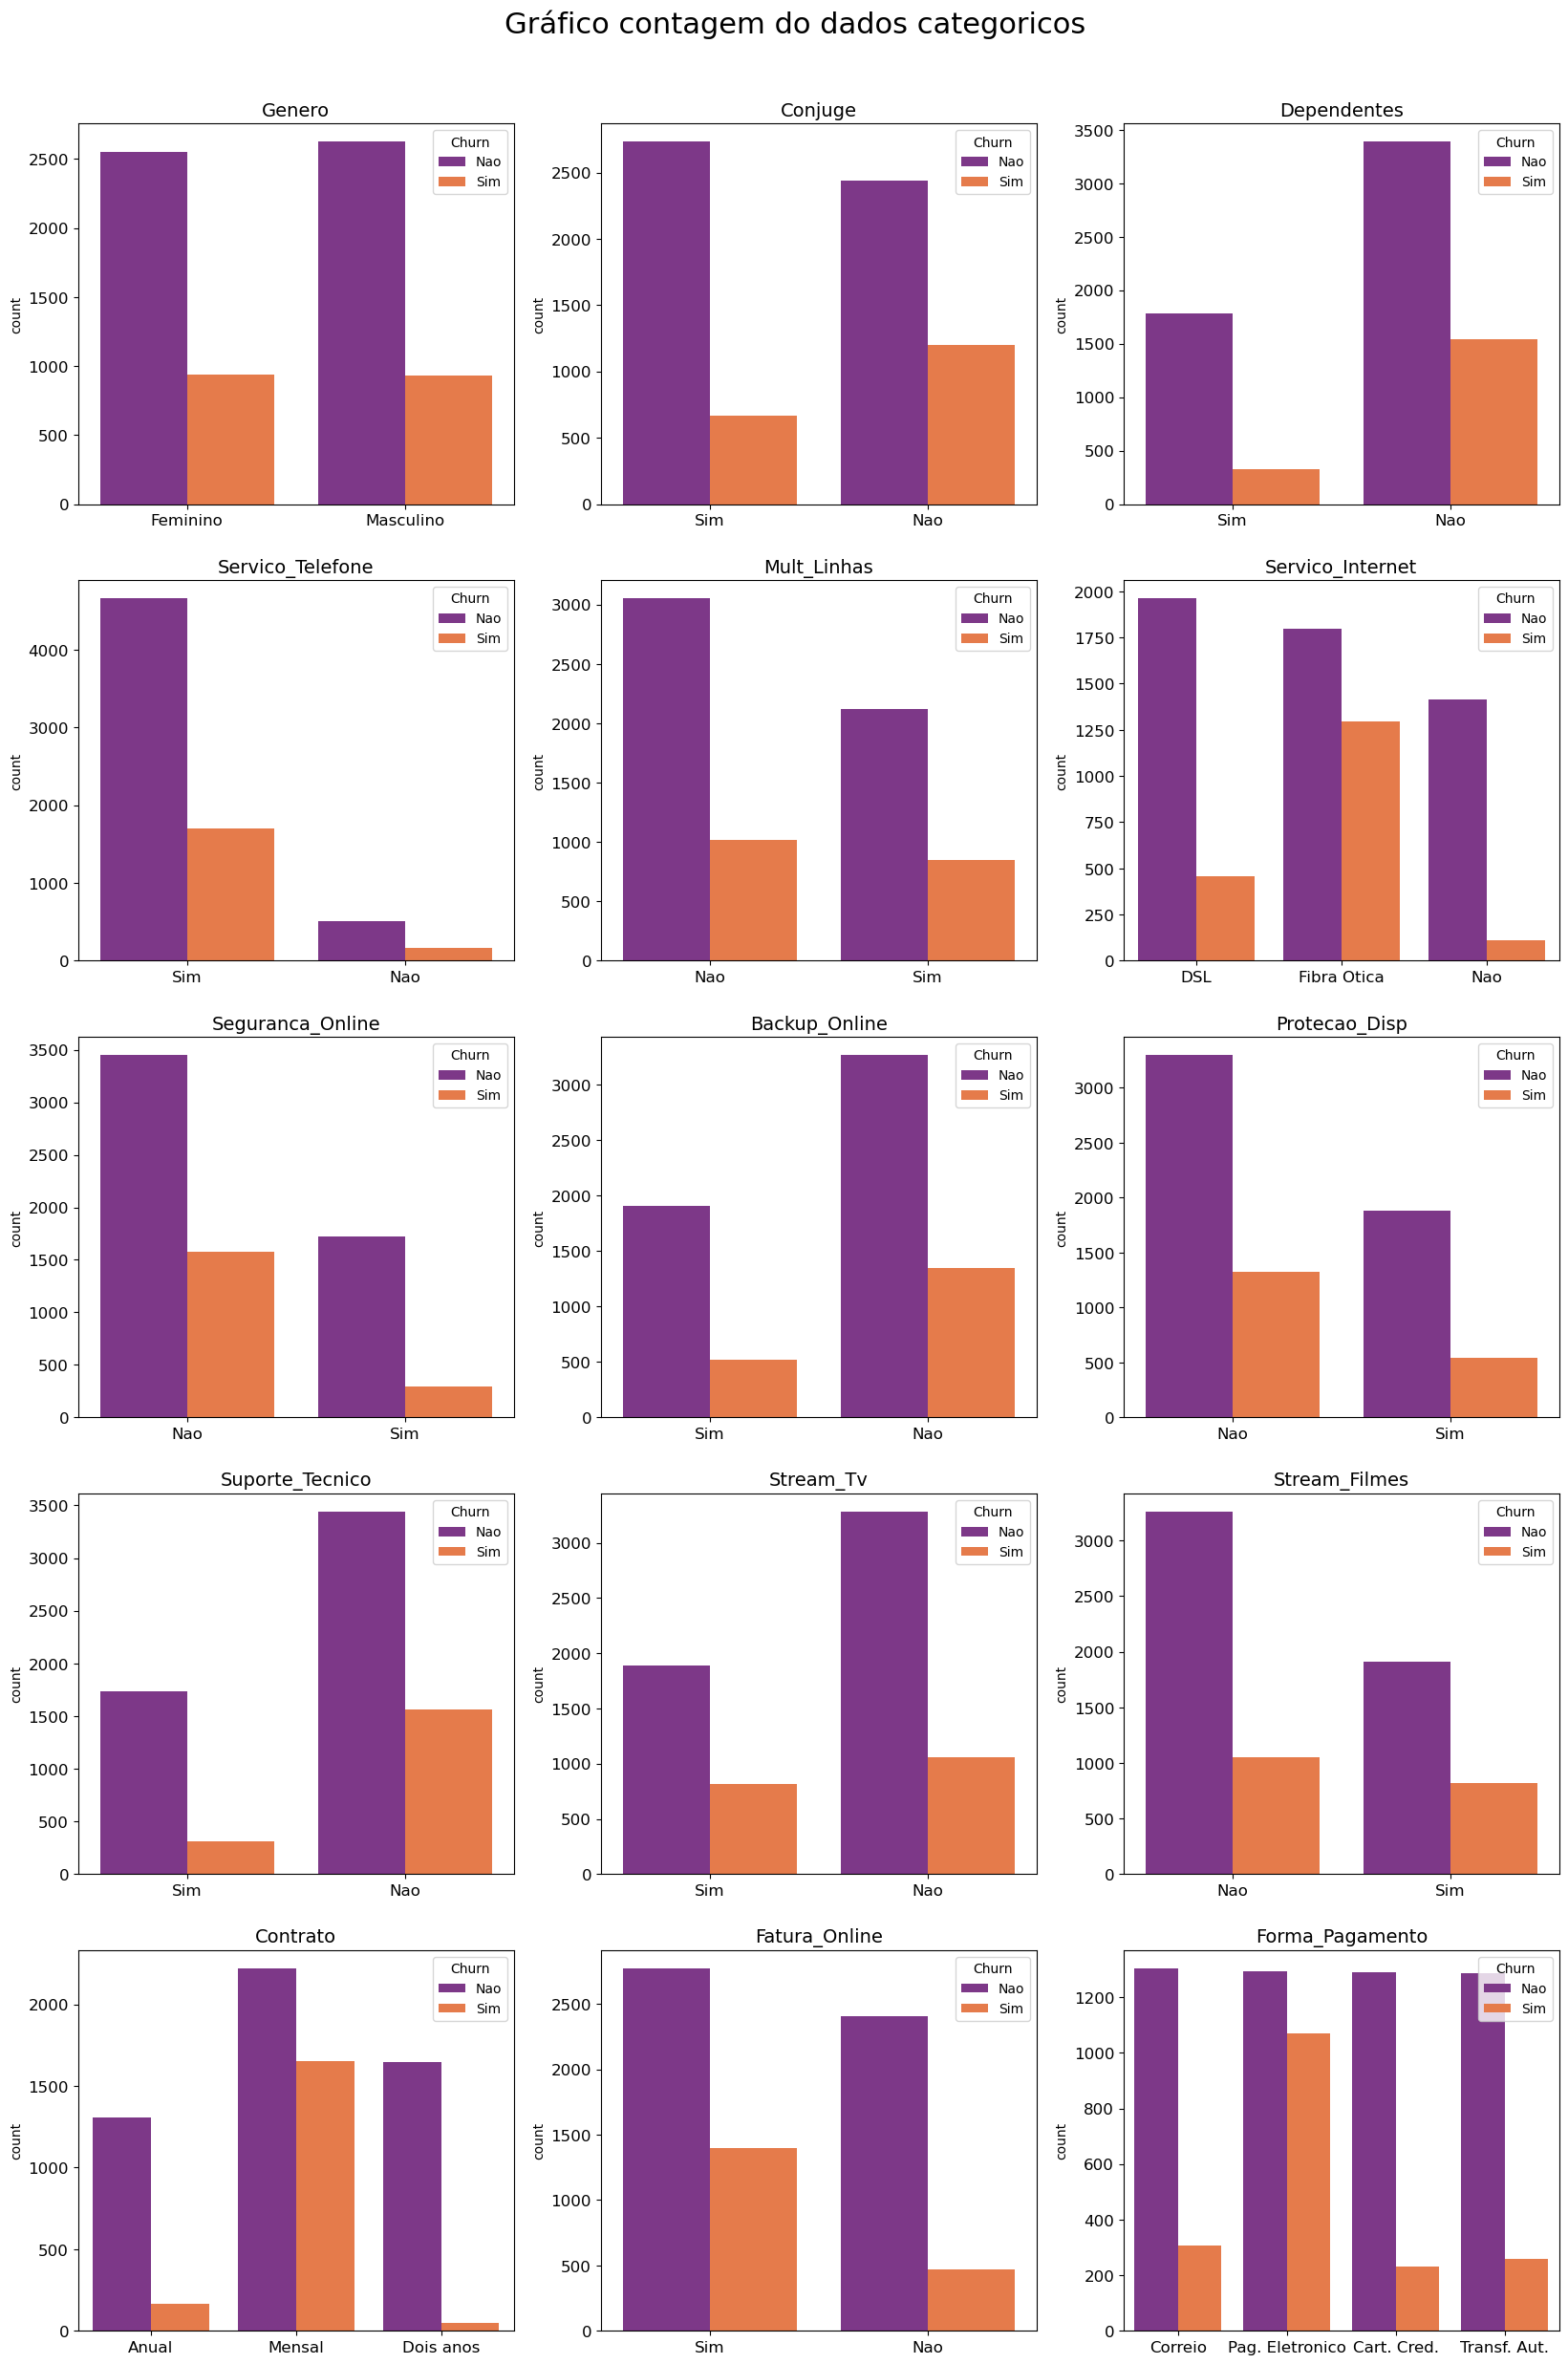

In [71]:
valores_categoricos = dados.select_dtypes(include='object').columns

plt.figure(figsize=(20,30))

plt.suptitle('Gráfico contagem do dados categoricos', y=0.92, fontsize=22)
for i, col in enumerate(valores_categoricos[1:-1], start=1):
    plt.subplot(5,3,i)
    sns.countplot(data= dados, x=dados[col], hue='Churn', palette=[ROXO, LARANJA, VERMELHO])
    plt.title(f'{col}'.title(), fontsize=14)
    plt.xlabel('')
    plt.tick_params(labelsize=12)
    
plt.savefig('grafico_barras_novexus.png')

## Insights

* Conjuge: Vemos que quem não tem conjugue é mais propenso a deixar de ser cliente.
* Dependentes: Quem não tem dependentes são mais propensos a deixar de ser cliente.
* Serviço Telefonico: Serviços de Fibra Ótica são mais propensos a deixar de ser cliente.
* Suporte Técnico: Quem não tem suporte técnico é mais propenso a deixar de ser cliente.
* Tipo de contrato: Quem tem o contrato mensal é mais propenso a deixar de ser cliente.
* Fatura: Quem tem Fatura Online é mais propenso a deixar de ser cliente.
* Forma de Pagamento: Quem faz pagamento eletronico é mais propenso a deixar de ser cliente.

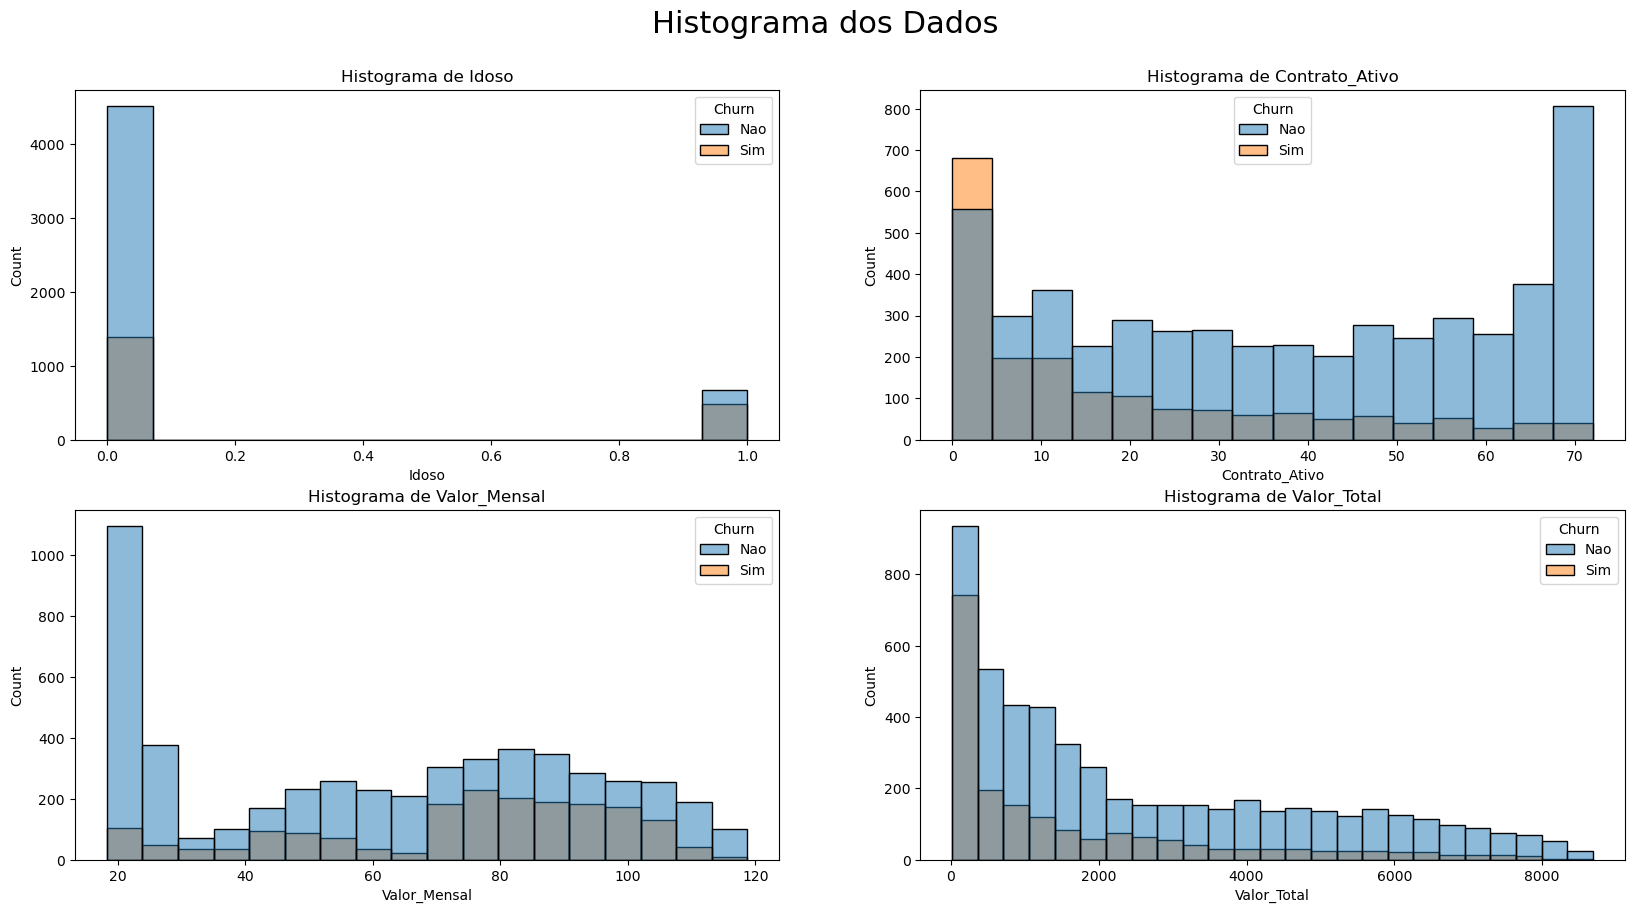

In [79]:
valores_numericos = dados.select_dtypes(exclude='object').columns

fig, axes = plt.subplots(2,2, figsize=(20,10))

fig.suptitle('Histograma dos Dados', fontsize=22, y=0.9)
for i, (ax, col) in enumerate(zip(axes.flatten(), valores_numericos), start=1):
    sns.histplot(data=dados, x=col, hue='Churn', ax=ax)
    ax.set_title(f'Histograma de {col}')
    
fig.savefig('./imagens/histogramas.png')

## Insights

* Da maioria dos idosos deixam o serviço (mas a base de dados em poucos dados sobre os idosos, talvez pq não são um publico com interesse nesse serviço)
* Contrato Ativo: Vemos que tem menos de 10 meses de contrato tendem a deixar o serviço
* Valores mensais entre 70 a 100 tendem a deixar o serviço
* Quem teve o gasto total baixo tendem a deixar o serviço

In [80]:
dados.head()

,Id,Genero,Idoso,Conjuge,Dependentes,Contrato_Ativo,Servico_Telefone,Mult_Linhas,Servico_Internet,Seguranca_Online,Backup_Online,Protecao_Disp,Suporte_Tecnico,Stream_Tv,Stream_Filmes,Contrato,Fatura_Online,Forma_Pagamento,Valor_Mensal,Valor_Total,Churn
0,0002-ORFBO,Feminino,0,Sim,Sim,9,Sim,Nao,DSL,Nao,Sim,Nao,Sim,Sim,Nao,Anual,Sim,Correio,65.6,593.30,Nao
1,0003-MKNFE,Masculino,0,Nao,Nao,9,Sim,Sim,DSL,Nao,Nao,Nao,Nao,Nao,Sim,Mensal,Nao,Correio,59.9,542.40,Nao
2,0004-TLHLJ,Masculino,0,Nao,Nao,4,Sim,Nao,Fibra Otica,Nao,Nao,Sim,Nao,Nao,Nao,Mensal,Sim,Pag. Eletronico,73.9,280.85,Sim
3,0011-IGKFF,Masculino,1,Sim,Nao,13,Sim,Nao,Fibra Otica,Nao,Sim,Sim,Nao,Sim,Sim,Mensal,Sim,Pag. Eletronico,98.0,1237.85,Sim
4,0013-EXCHZ,Feminino,1,Sim,Nao,3,Sim,Nao,Fibra Otica,Nao,Nao,Nao,Sim,Sim,Nao,Mensal,Sim,Correio,83.9,267.40,Sim


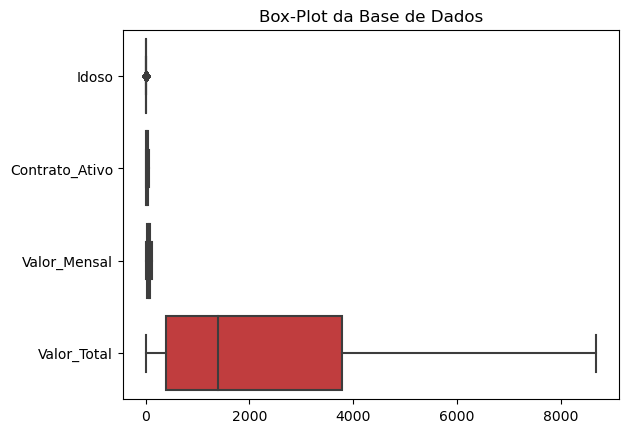

In [81]:
plt.title('Box-Plot da Base de Dados')
sns.boxplot(dados, orient='h')
plt.savefig('boxplot_novexus.png')
plt.show()

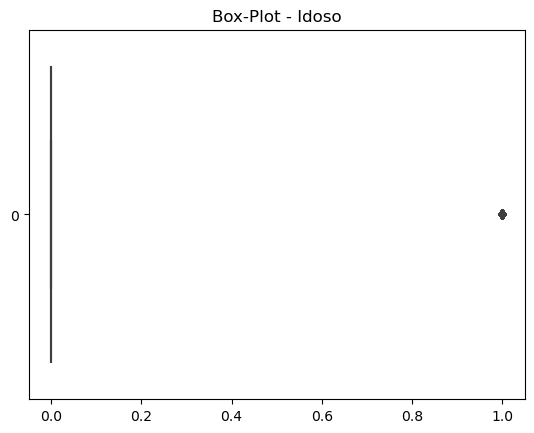

In [82]:
plt.title('Box-Plot - Idoso')
sns.boxplot(dados['Idoso'], orient='h');

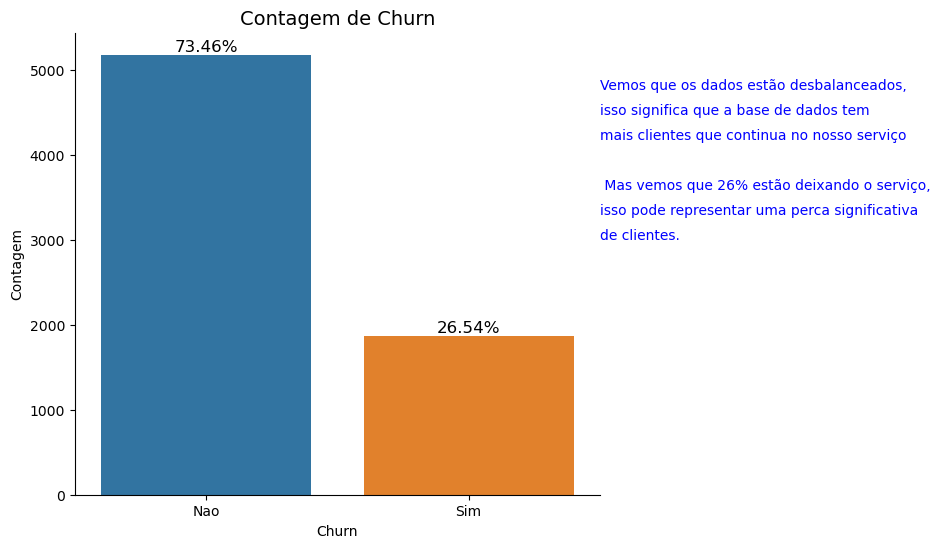

In [123]:
##### porcentagem_churn = dados['Churn'].value_counts(normalize=True) *100
contagem_churn = dados['Churn'].value_counts()

fig, ax = plt.subplots(figsize=(10,6))
fig.subplots_adjust(right=0.65)
ax.set_title('Contagem de Churn', fontsize=14)
ax = sns.countplot(x=dados['Churn'])
ax.set_ylabel('Contagem')
sns.despine()

for i, (cent,v)  in enumerate(zip(porcentagem_churn, contagem_churn)):
    ax.text(x=i, y=v, s=f'{cent:.2f}%', ha='center',va='bottom', fontsize=12,)

ax.text(x=1.5, y= 3e3, s='Vemos que os dados estão desbalanceados,\n'
                         'isso significa que a base de dados tem\n'
                         'mais clientes que continua no nosso serviço\n'
                         '\n Mas vemos que 26% estão deixando o serviço,\n'
                         'isso pode representar uma perca significativa\n'
                         'de clientes.', linespacing=2, color='blue')
fig.savefig('./imagens/grafico_barras_churn.png', )
plt.show()

## Transformação das features em numéricas

In [124]:
dados.head()

,Id,Genero,Idoso,Conjuge,Dependentes,Contrato_Ativo,Servico_Telefone,Mult_Linhas,Servico_Internet,Seguranca_Online,Backup_Online,Protecao_Disp,Suporte_Tecnico,Stream_Tv,Stream_Filmes,Contrato,Fatura_Online,Forma_Pagamento,Valor_Mensal,Valor_Total,Churn
0,0002-ORFBO,Feminino,0,Sim,Sim,9,Sim,Nao,DSL,Nao,Sim,Nao,Sim,Sim,Nao,Anual,Sim,Correio,65.6,593.30,Nao
1,0003-MKNFE,Masculino,0,Nao,Nao,9,Sim,Sim,DSL,Nao,Nao,Nao,Nao,Nao,Sim,Mensal,Nao,Correio,59.9,542.40,Nao
2,0004-TLHLJ,Masculino,0,Nao,Nao,4,Sim,Nao,Fibra Otica,Nao,Nao,Sim,Nao,Nao,Nao,Mensal,Sim,Pag. Eletronico,73.9,280.85,Sim
3,0011-IGKFF,Masculino,1,Sim,Nao,13,Sim,Nao,Fibra Otica,Nao,Sim,Sim,Nao,Sim,Sim,Mensal,Sim,Pag. Eletronico,98.0,1237.85,Sim
4,0013-EXCHZ,Feminino,1,Sim,Nao,3,Sim,Nao,Fibra Otica,Nao,Nao,Nao,Sim,Sim,Nao,Mensal,Sim,Correio,83.9,267.40,Sim


In [125]:
colunas_dummie = dados.iloc[:, [1,3,4,6,7,8,9,10,11,12,13,14,15,16,17,-1]].columns
colunas_dummie
dados_dummies = pd.get_dummies(data=dados, columns=colunas_dummie, dtype=int, drop_first=True)

In [126]:
dados_dummies.drop('Id', axis=1, inplace=True)

In [127]:
dados_dummies.columns = dados_dummies.columns.str.replace('_Sim','').str.replace('_Nao','').str.replace('_Masculino','')

In [128]:
dados_dummies

,Idoso,Contrato_Ativo,Valor_Mensal,Valor_Total,Genero,Conjuge,Dependentes,Servico_Telefone,Mult_Linhas,Servico_Internet_Fibra Otica,Servico_Internet,Seguranca_Online,Backup_Online,Protecao_Disp,Suporte_Tecnico,Stream_Tv,Stream_Filmes,Contrato_Dois anos,Contrato_Mensal,Fatura_Online,Forma_Pagamento_Correio,Forma_Pagamento_Pag. Eletronico,Forma_Pagamento_Transf. Aut.,Churn
0,0,9,65.60,593.30,0,1,1,1,0,0,0,0,1,0,1,1,0,0,0,1,1,0,0,0
1,0,9,59.90,542.40,1,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0
2,0,4,73.90,280.85,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,1,0,1,0,1
3,1,13,98.00,1237.85,1,1,0,1,0,1,0,0,1,1,0,1,1,0,1,1,0,1,0,1
4,1,3,83.90,267.40,0,1,0,1,0,1,0,0,0,0,1,1,0,0,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,13,55.15,742.90,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0
7039,0,22,85.10,1873.70,1,1,0,1,1,1,0,0,0,0,0,0,1,0,1,1,0,1,0,1
7040,0,2,50.30,92.75,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0
7041,0,67,67.85,4627.65,1,1,1,1,0,0,0,1,0,1,1,0,1,1,0,0,1,0,0,0


## Correlação dos Dados

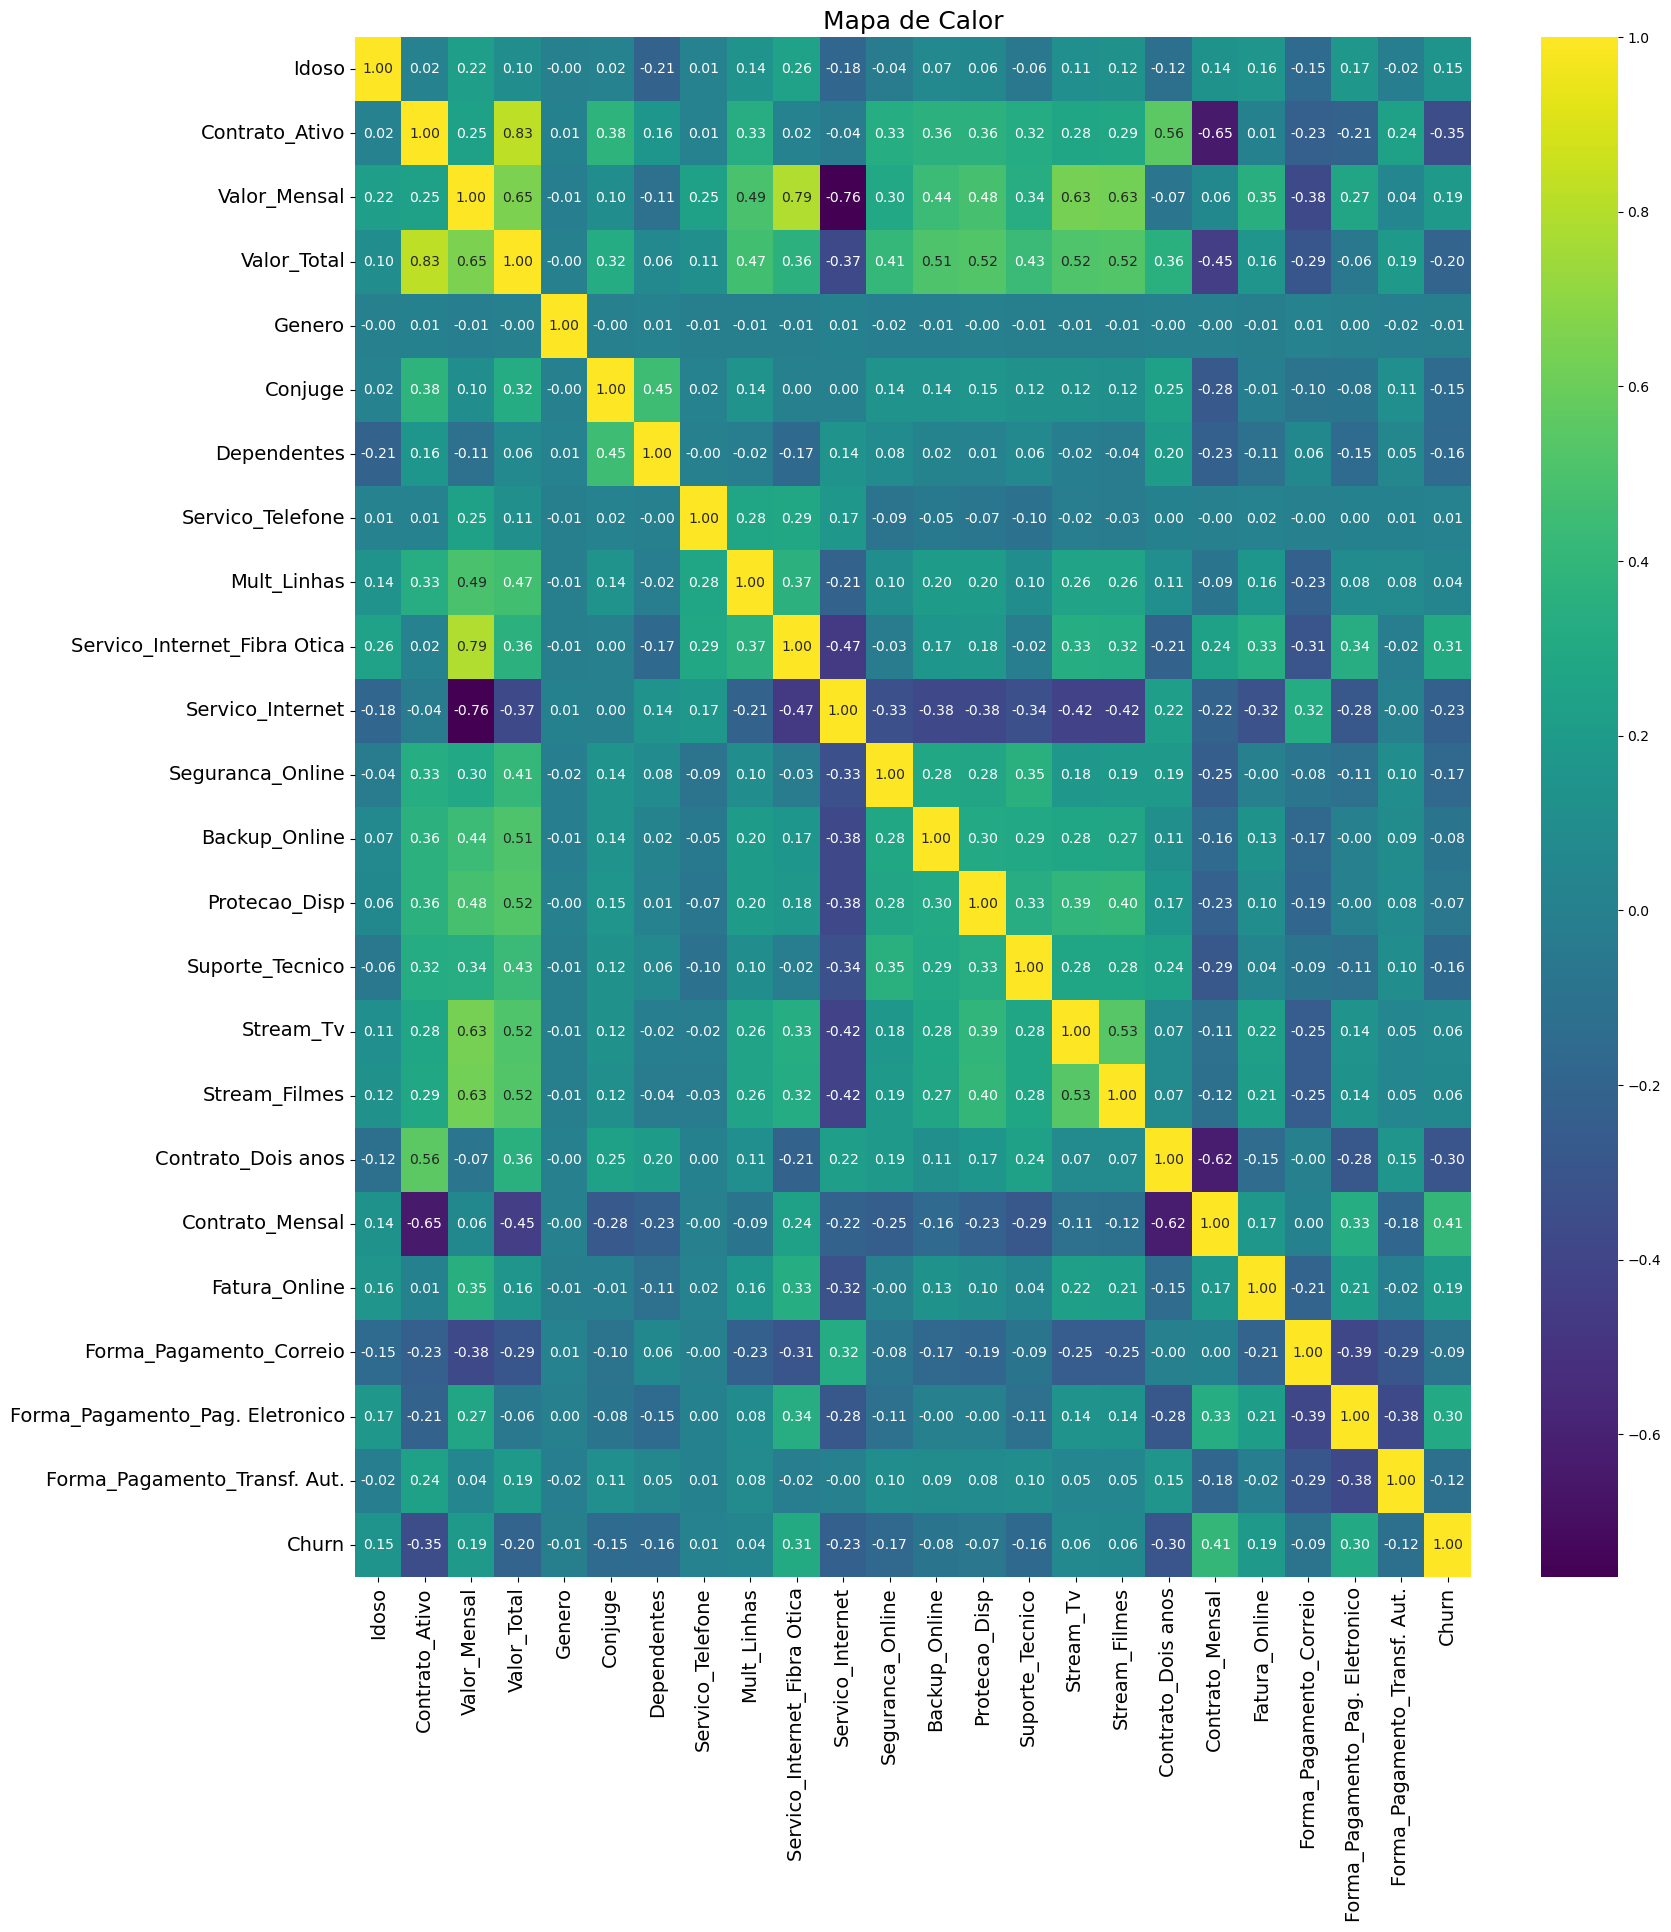

In [129]:
correlacao = dados_dummies.corr()

fig, ax = plt.subplots(figsize=(18,20))
ax.set_title('Mapa de Calor', fontsize=18)
sns.heatmap(correlacao, annot=True, fmt='.2f', cmap='viridis',ax=ax)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)


fig.savefig('./imagens/Correlacao_novexus.png')

## Base de Dados Final

In [305]:
# Base de Dados para Análise (Traduzida, limpa)
dados.to_csv('./datasets/base_dados_novexus_clean.csv', index=False)
dados.head()

,Id,Genero,Idoso,Conjuge,Dependentes,Contrato_Ativo,Servico_Telefone,Mult_Linhas,Servico_Internet,Seguranca_Online,Backup_Online,Protecao_Disp,Suporte_Tecnico,Stream_Tv,Stream_Filmes,Contrato,Fatura_Online,Forma_Pagamento,Valor_Mensal,Valor_Total,Churn
0,0002-ORFBO,Feminino,0,Sim,Sim,9,Sim,Nao,DSL,Nao,Sim,Nao,Sim,Sim,Nao,Anual,Sim,Correio,65.6,593.30,Nao
1,0003-MKNFE,Masculino,0,Nao,Nao,9,Sim,Sim,DSL,Nao,Nao,Nao,Nao,Nao,Sim,Mensal,Nao,Correio,59.9,542.40,Nao
2,0004-TLHLJ,Masculino,0,Nao,Nao,4,Sim,Nao,Fibra Otica,Nao,Nao,Sim,Nao,Nao,Nao,Mensal,Sim,Pag. Eletronico,73.9,280.85,Sim
3,0011-IGKFF,Masculino,1,Sim,Nao,13,Sim,Nao,Fibra Otica,Nao,Sim,Sim,Nao,Sim,Sim,Mensal,Sim,Pag. Eletronico,98.0,1237.85,Sim
4,0013-EXCHZ,Feminino,1,Sim,Nao,3,Sim,Nao,Fibra Otica,Nao,Nao,Nao,Sim,Sim,Nao,Mensal,Sim,Correio,83.9,267.40,Sim


In [306]:
# Base de Dados para Machine Learning
dados_dummies.to_csv('./datasets/base_dados_nevexus_ml.csv', index=False)
dados_dummies.head()

,Idoso,Contrato_Ativo,Valor_Mensal,Valor_Total,Genero,Conjuge,Dependentes,Servico_Telefone,Mult_Linhas,Servico_Internet_Fibra Otica,Servico_Internet,Seguranca_Online,Backup_Online,Protecao_Disp,Suporte_Tecnico,Stream_Tv,Stream_Filmes,Contrato_Dois anos,Contrato_Mensal,Fatura_Online,Forma_Pagamento_Correio,Forma_Pagamento_Pag. Eletronico,Forma_Pagamento_Transf. Aut.,Churn
0,0,9,65.6,593.30,0,1,1,1,0,0,0,0,1,0,1,1,0,0,0,1,1,0,0,0
1,0,9,59.9,542.40,1,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0
2,0,4,73.9,280.85,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,1,0,1,0,1
3,1,13,98.0,1237.85,1,1,0,1,0,1,0,0,1,1,0,1,1,0,1,1,0,1,0,1
4,1,3,83.9,267.40,0,1,0,1,0,1,0,0,0,0,1,1,0,0,1,1,1,0,0,1


In [307]:
dados_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Idoso                            7043 non-null   int64  
 1   Contrato_Ativo                   7043 non-null   int64  
 2   Valor_Mensal                     7043 non-null   float64
 3   Valor_Total                      7043 non-null   float64
 4   Genero                           7043 non-null   int32  
 5   Conjuge                          7043 non-null   int32  
 6   Dependentes                      7043 non-null   int32  
 7   Servico_Telefone                 7043 non-null   int32  
 8   Mult_Linhas                      7043 non-null   int32  
 9   Servico_Internet_Fibra Otica     7043 non-null   int32  
 10  Servico_Internet                 7043 non-null   int32  
 11  Seguranca_Online                 7043 non-null   int32  
 12  Backup_Online       

In [862]:
# Para usarmos para prever o Churn desses dados inconsistente
churn_nulos.to_csv('./datasets/churn_nulo.csv', index=False)
churn_nulos

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Churn
30,0047-ZHDTW,Female,0,No,No,11,Yes,Yes,Fiber optic,Yes,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),79.00,929.30,NaN
75,0120-YZLQA,Male,0,No,No,71,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.90,1355.10,NaN
96,0154-QYHJU,Male,0,No,No,29,Yes,No,DSL,Yes,Yes,No,Yes,No,No,One year,Yes,Electronic check,58.75,1696.20,NaN
98,0162-RZGMZ,Female,1,No,No,5,Yes,No,DSL,Yes,Yes,No,Yes,No,No,Month-to-month,No,Credit card (automatic),59.90,287.85,NaN
175,0274-VVQOQ,Male,1,Yes,No,65,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),103.15,6792.45,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7158,9840-GSRFX,Female,0,No,No,14,Yes,Yes,DSL,No,Yes,No,No,No,No,One year,Yes,Mailed check,54.25,773.20,NaN
7180,9872-RZQQB,Female,0,Yes,No,49,No,No phone service,DSL,Yes,No,No,No,Yes,No,Month-to-month,No,Bank transfer (automatic),40.65,2070.75,NaN
7211,9920-GNDMB,Male,0,No,No,9,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,76.25,684.85,NaN
7239,9955-RVWSC,Female,0,Yes,Yes,67,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),19.25,1372.90,NaN


# Machine Learning

* Dados convertido para tipo numerico:

    * 0 = Não
    * 1 = Sim

In [32]:
dados_ml = pd.read_csv('./datasets/base_dados_nevexus_ml.csv')
dados_ml

,Idoso,Contrato_Ativo,Valor_Mensal,Valor_Total,Genero,Conjuge,Dependentes,Servico_Telefone,Mult_Linhas,Servico_Internet_Fibra Otica,Servico_Internet,Seguranca_Online,Backup_Online,Protecao_Disp,Suporte_Tecnico,Stream_Tv,Stream_Filmes,Contrato_Dois anos,Contrato_Mensal,Fatura_Online,Forma_Pagamento_Correio,Forma_Pagamento_Pag. Eletronico,Forma_Pagamento_Transf. Aut.,Churn
0,0,9,65.60,593.30,0,1,1,1,0,0,0,0,1,0,1,1,0,0,0,1,1,0,0,0
1,0,9,59.90,542.40,1,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0
2,0,4,73.90,280.85,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,1,0,1,0,1
3,1,13,98.00,1237.85,1,1,0,1,0,1,0,0,1,1,0,1,1,0,1,1,0,1,0,1
4,1,3,83.90,267.40,0,1,0,1,0,1,0,0,0,0,1,1,0,0,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,13,55.15,742.90,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0
7039,0,22,85.10,1873.70,1,1,0,1,1,1,0,0,0,0,0,0,1,0,1,1,0,1,0,1
7040,0,2,50.30,92.75,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0
7041,0,67,67.85,4627.65,1,1,1,1,0,0,0,1,0,1,1,0,1,1,0,0,1,0,0,0


In [33]:
X = dados_ml.drop('Churn', axis=1)
y = dados_ml.Churn

## Balanceamento dos dados

In [34]:
from imblearn.over_sampling import SMOTE

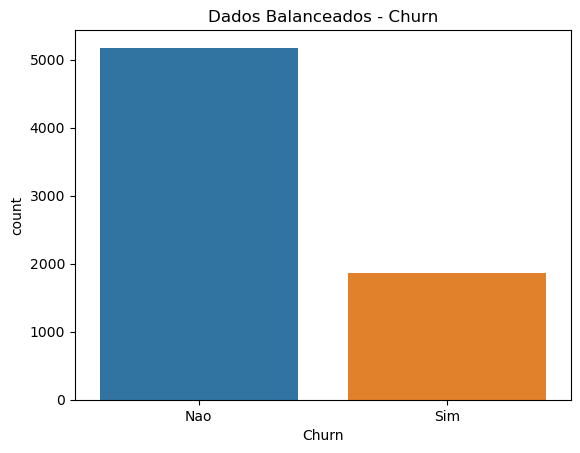

In [35]:
plt.title('Dados Balanceados - Churn')
sns.countplot(x=y)
plt.xticks(ticks=[0, 1], labels=['Nao', 'Sim']);

In [36]:
dados_ml.Churn.value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [37]:
smote = SMOTE(sampling_strategy='minority')
X_smote, y_smote = smote.fit_resample(X, y)

In [38]:
np.unique(y_smote, return_counts=True)

(array([0, 1], dtype=int64), array([5174, 5174], dtype=int64))

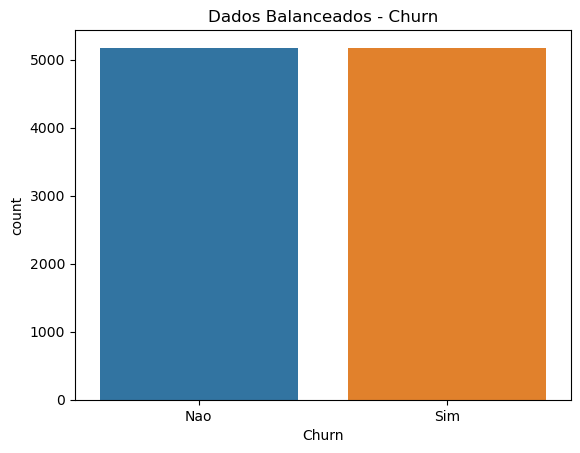

In [39]:
plt.title('Dados Balanceados - Churn')
sns.countplot(x=y_smote)
plt.xticks(ticks=[0, 1], labels=['Nao', 'Sim']);

## Normalização dos dados

In [40]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

In [41]:
scaler = StandardScaler()

In [42]:
X_norm = scaler.fit_transform(X_smote)
X_norm

array([[-0.39375071, -0.77303761, -0.07795204, ...,  2.12716395,
        -0.73538976, -0.43161223],
       [-0.39375071, -0.77303761, -0.27601353, ...,  2.12716395,
        -0.73538976, -0.43161223],
       [-0.39375071, -0.98111563,  0.21045329, ..., -0.47010951,
         1.35982313, -0.43161223],
       ...,
       [-0.39375071, -0.6898064 ,  0.22652496, ..., -0.47010951,
        -0.73538976, -0.43161223],
       [-0.39375071, -1.10596245, -0.78615304, ..., -0.47010951,
         1.35982313, -0.43161223],
       [-0.39375071,  0.84997098,  1.08533519, ..., -0.47010951,
        -0.73538976, -0.43161223]])

## Divisão da Base de Dados em treino e teste

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
# Divisao da base com dados normalizados
X_treino_norm, X_teste_norm, y_treino_norm, y_teste_norm = train_test_split(X_norm, y_smote, test_size=0.2)

In [45]:
X_treino_norm.shape, X_teste_norm.shape, y_treino_norm.shape, y_teste_norm.shape

((8278, 23), (2070, 23), (8278,), (2070,))

## Modelos de Machine Learning

In [46]:
def treinamento_ml(algoritmo, X_train, y_train, X_test, y_test):
    
    # Generalizando o treinamento para os modelos
    model = algoritmo
    model.fit(X_train, y_train)
    acuracia = model.score(X_test, y_test)
    previsoes = model.predict(X_test)
    
    return acuracia, previsoes

### KNN 

In [343]:
# Modelo KNN baseado na distancia 
from sklearn.neighbors import KNeighborsClassifier

In [344]:
model_knn = KNeighborsClassifier()

acuracia_knn_norm, previsoes_knn_norm = treinamento_ml(model_knn, X_treino_norm, y_treino_norm, X_teste_norm, y_teste_norm)

In [345]:
acuracia_knn_norm

0.7956521739130434


### Naive Bayes

In [346]:
# Modelo Naive Bayes baseado nas probabilidades
from sklearn.naive_bayes import BernoulliNB

In [347]:
model_nv = BernoulliNB()

acuracia_naive_bayes_norm, previsoes_naive = treinamento_ml(model_nv, X_treino_norm, y_treino_norm, X_teste_norm, y_teste_norm)

In [348]:
acuracia_naive_bayes_norm

0.7855072463768116

### Decision Tree

In [349]:
# Decision Tree Baseado em uma Árvore de Decisão
from sklearn.tree import DecisionTreeClassifier

In [350]:
model_tree = DecisionTreeClassifier()

acuracia_tree_norm, previsoes_tree = treinamento_ml(model_tree, X_treino_norm, y_treino_norm, X_teste_norm, y_teste_norm)

In [351]:
acuracia_tree_norm

0.7782608695652173

### Random Forest

In [49]:
# Decision Tree Baseado em várias Árvores de Decisão
from sklearn.ensemble import RandomForestClassifier

In [50]:
model_random = RandomForestClassifier()

acuracia_random, previsoes_random = treinamento_ml(model_random, X_treino_norm, y_treino_norm, X_teste_norm, y_teste_norm)

In [51]:
acuracia_random

0.8381642512077294

### Stochastic Gradient Boosting (SGD)

In [355]:
# É uma técnica que introduz estocasticidade (aleatoriedade) no processo de treinamento. 
from sklearn.ensemble import GradientBoostingClassifier

In [356]:
model_gradient = GradientBoostingClassifier()

acuracia_gradient, previsoes_gradient = treinamento_ml(model_gradient, X_treino_norm, y_treino_norm, X_teste_norm, y_teste_norm)

In [357]:
acuracia_gradient

0.8241545893719807

### SVM

In [358]:
## SVM baseado é baseado na ideia de encontrar um hiperplano de separação das classes
from sklearn.svm import SVC

In [359]:
model_svm = SVC()

acuracia_svm, previsoes_svm = treinamento_ml(model_svm, X_treino_norm, y_treino_norm, X_teste_norm, y_teste_norm)

In [360]:
acuracia_svm

0.8328502415458937

### Redes Neurais

In [361]:
# RNA baseado em encotrar os melhores pesos 
from sklearn.neural_network import MLPClassifier

In [362]:
model_rna = MLPClassifier(max_iter=2000)

acuracia_rna, previsoes_rna = treinamento_ml(model_rna, X_treino_norm, y_treino_norm, X_teste_norm, y_teste_norm)

In [363]:
acuracia_rna

0.8265700483091788

## Comparação Modelos

In [364]:
modelos = {'KNN': [acuracia_knn_norm], 'Naive_bayes': [acuracia_naive_bayes_norm],
          'Decision_tree': [acuracia_tree_norm],'Random_forest':[acuracia_random], 
          'Stochastic Gradient Boosting': [acuracia_gradient],
          'SVM': [acuracia_svm], 'Redes_neurais':[acuracia_rna]}

In [365]:
modelos_acuracia = pd.DataFrame(modelos).T
modelos_acuracia.rename(columns = {0:'Acuracia'}, inplace=True)

In [366]:
modelos_acuracia

,Acuracia
KNN,0.795652
Naive_bayes,0.785507
Decision_tree,0.778261
Random_forest,0.846377
Stochastic Gradient Boosting,0.824155
SVM,0.832850
Redes_neurais,0.826570


## Métricas de Avaliação

In [367]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

In [368]:
def graficos_avaliacao(y_true, y_pred, modelo= ''):
    fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(16,6))
    
    fig.suptitle(f'Gráficos de Avaliação {modelo}', fontsize=18, y=1)
    # Gráfico curva roc
    roc_auc = roc_auc_score(y_true, y_pred)
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
    roc_display.plot(color='purple', ax=ax[0], )
    ax[0].set_xlabel('Falso Positivo', color='gray')
    ax[0].set_ylabel('Verdadeiro Positivo', color='gray')
    ax[0].grid(drawstyle='steps')
    ax[0].plot([0, 1], [0, 1], linestyle='--', color='orange')
    ax[0].set_title(f'Curva ROC {modelo}', color='gray')

    
    # Gráfico matrix confusão
    cm = confusion_matrix(y_true, y_pred)
    cm_display = ConfusionMatrixDisplay(cm)
    cm_display.plot(cmap='Purples', ax=ax[1])
    ax[1].set_title(f"Matriz de Confusão {modelo}", color='gray')
    ax[1].set_xlabel('Labels Preditas', color='gray')
    ax[1].set_ylabel('Labels Verdadeiras', color='gray')
    
#     plt.tight_layout()
    return fig

## KNN

In [369]:
accuracy_score(y_teste_norm, previsoes_knn_norm)

0.7956521739130434

In [370]:
print(classification_report(y_teste_norm, previsoes_knn_norm))

              precision    recall  f1-score   support

           0       0.85      0.72      0.78      1044
           1       0.75      0.87      0.81      1026

    accuracy                           0.80      2070
   macro avg       0.80      0.80      0.79      2070
weighted avg       0.80      0.80      0.79      2070



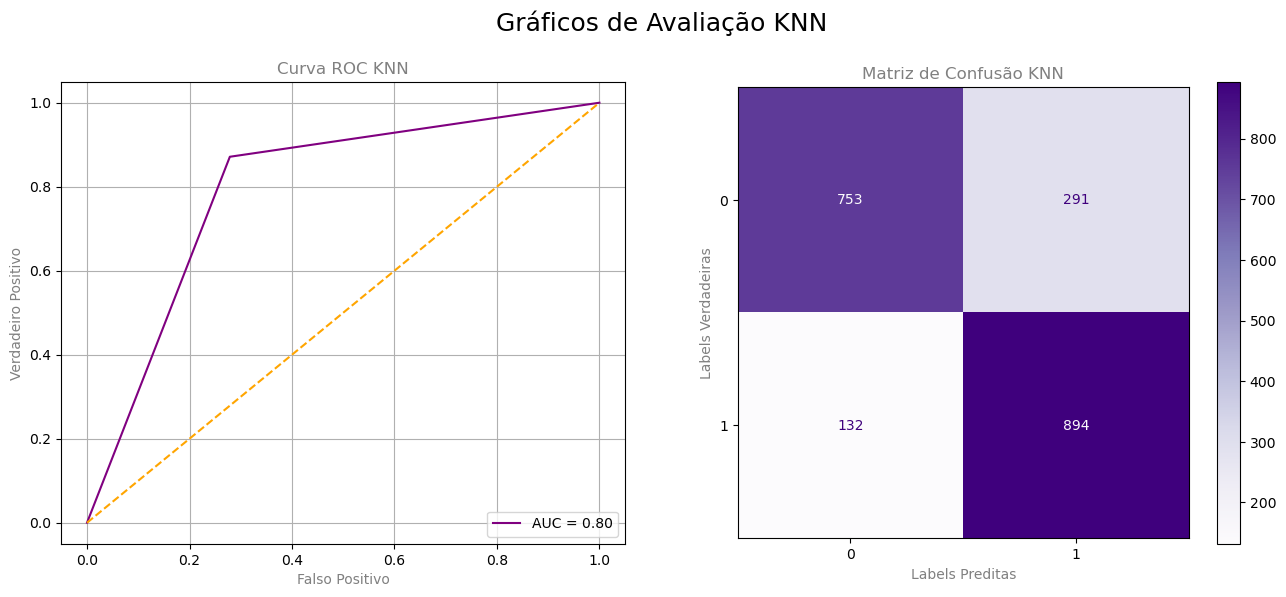

In [371]:
fig = graficos_avaliacao(y_teste_norm, previsoes_knn_norm, modelo= 'KNN')
fig.savefig('./imagens/metrica_knn.png')

### Decision Tree

In [372]:
accuracy_score(y_teste_norm, previsoes_tree)

0.7782608695652173

In [373]:
print(classification_report(y_teste_norm, previsoes_tree))

              precision    recall  f1-score   support

           0       0.79      0.76      0.77      1044
           1       0.76      0.80      0.78      1026

    accuracy                           0.78      2070
   macro avg       0.78      0.78      0.78      2070
weighted avg       0.78      0.78      0.78      2070



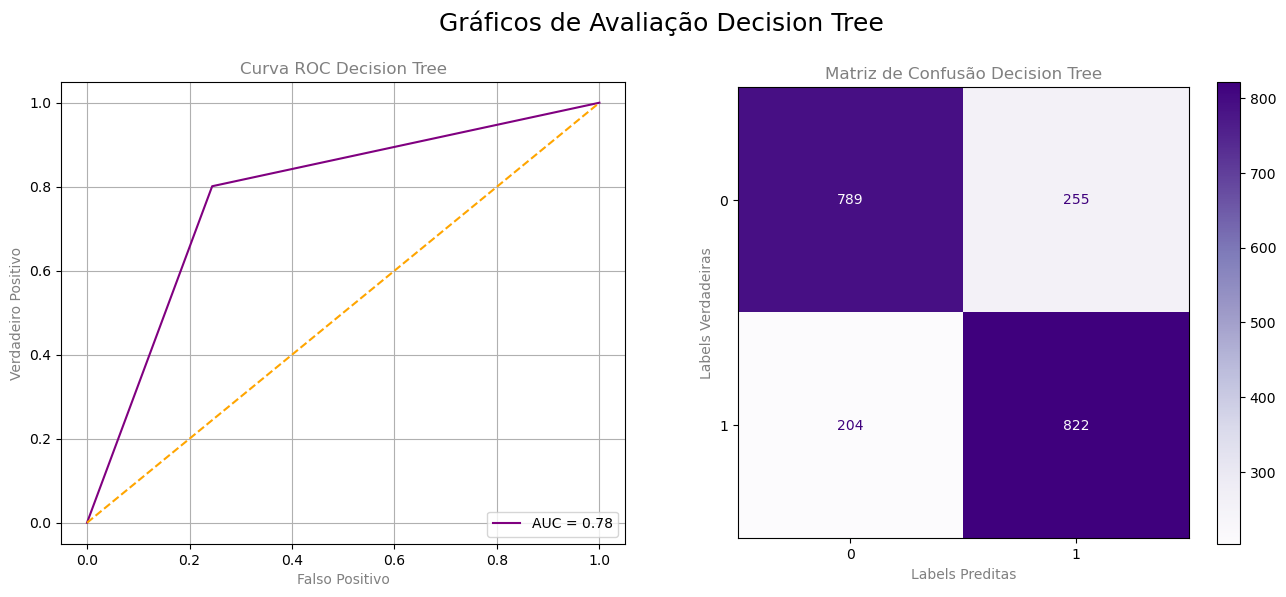

In [374]:
fig = graficos_avaliacao(y_teste_norm, previsoes_tree, 'Decision Tree')
fig.savefig('./imagens/metricas_tree.png')

### Random Forest

In [375]:
accuracy_score(y_teste_norm, previsoes_random)

0.8463768115942029

In [376]:
print(classification_report(y_teste_norm, previsoes_random))

              precision    recall  f1-score   support

           0       0.87      0.82      0.84      1044
           1       0.83      0.87      0.85      1026

    accuracy                           0.85      2070
   macro avg       0.85      0.85      0.85      2070
weighted avg       0.85      0.85      0.85      2070



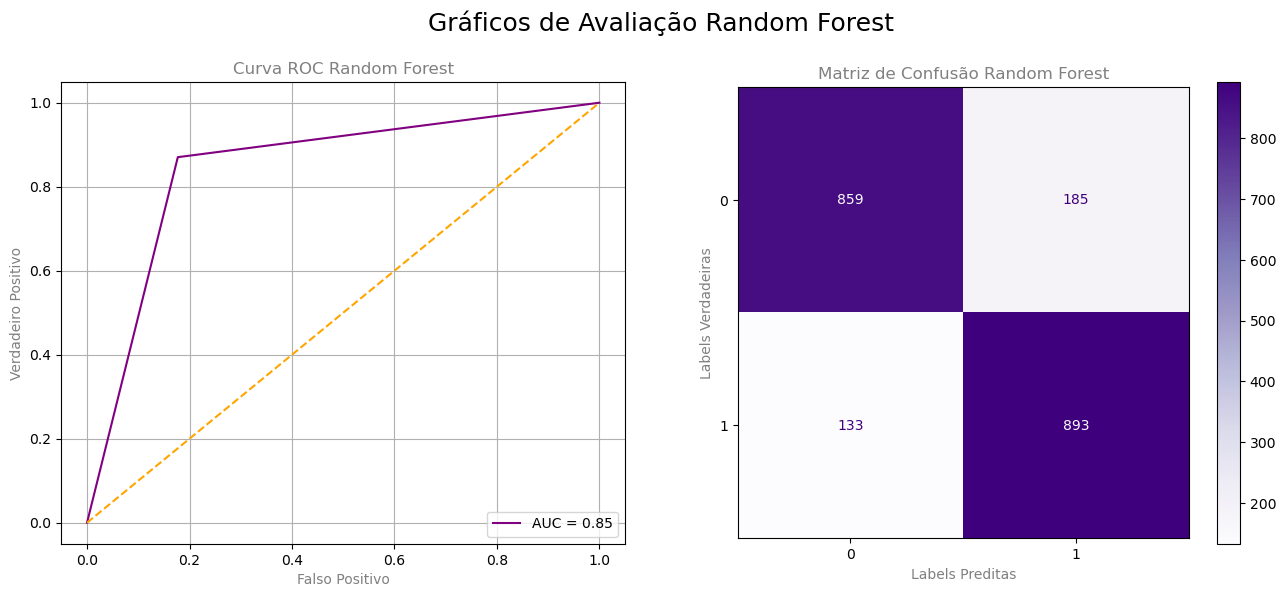

In [377]:
fig = graficos_avaliacao(y_teste_norm, previsoes_random, 'Random Forest')
fig.savefig('./imagens/metricas_random_forest.png')

### Stochastic Gradient Boosting

In [378]:
accuracy_score(y_teste_norm, previsoes_gradient)

0.8241545893719807

In [379]:
print(classification_report(y_teste_norm, previsoes_gradient))

              precision    recall  f1-score   support

           0       0.86      0.78      0.82      1044
           1       0.79      0.87      0.83      1026

    accuracy                           0.82      2070
   macro avg       0.83      0.82      0.82      2070
weighted avg       0.83      0.82      0.82      2070



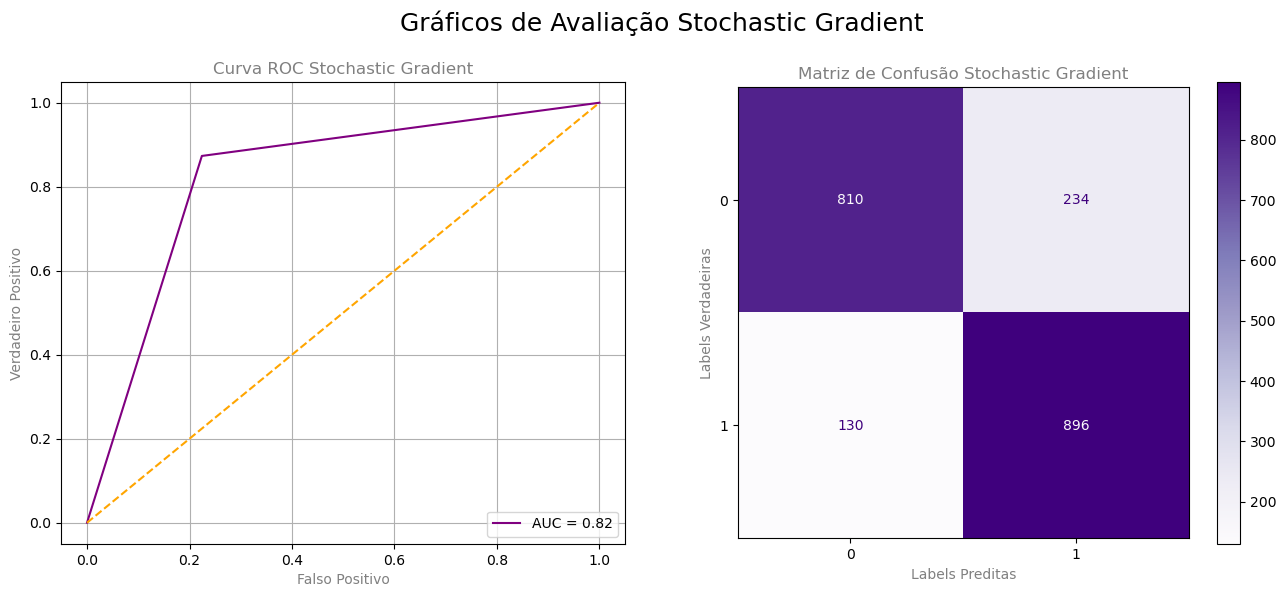

In [380]:
fig = graficos_avaliacao(y_teste_norm, previsoes_gradient, 'Stochastic Gradient')
fig.savefig('./imagens/metricas_stochastic_gradient.png')

### SVM

In [381]:
accuracy_score(y_teste_norm, previsoes_gradient)

0.8241545893719807

In [382]:
print(classification_report(y_teste_norm, previsoes_gradient))

              precision    recall  f1-score   support

           0       0.86      0.78      0.82      1044
           1       0.79      0.87      0.83      1026

    accuracy                           0.82      2070
   macro avg       0.83      0.82      0.82      2070
weighted avg       0.83      0.82      0.82      2070



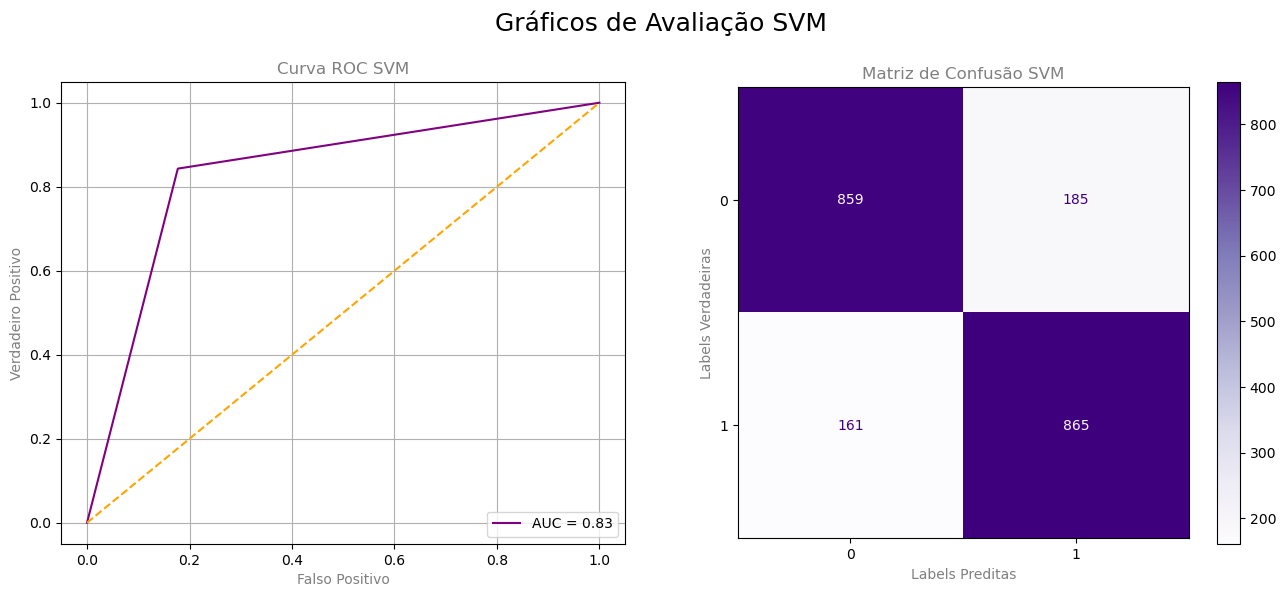

In [383]:
fig = graficos_avaliacao(y_teste_norm, previsoes_svm, 'SVM')
fig.savefig('./imagens/metricas_svm.png')

## Redes Neurais

In [384]:
accuracy_score(y_teste_norm, previsoes_rna)

0.8265700483091788

In [385]:
print(classification_report(y_teste_norm, previsoes_rna))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82      1044
           1       0.81      0.85      0.83      1026

    accuracy                           0.83      2070
   macro avg       0.83      0.83      0.83      2070
weighted avg       0.83      0.83      0.83      2070



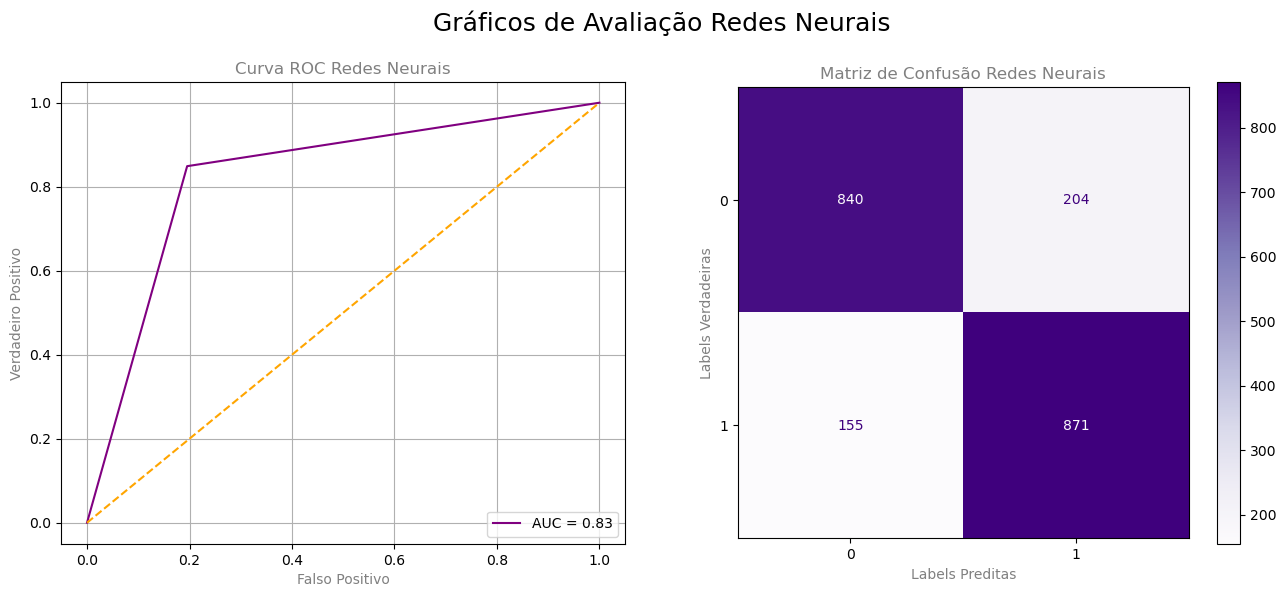

In [386]:
fig = graficos_avaliacao(y_teste_norm, previsoes_rna, 'Redes Neurais')
fig.savefig('./imagens/metricas_rna.png')

In [387]:
modelos_acuracia

,Acuracia
KNN,0.795652
Naive_bayes,0.785507
Decision_tree,0.778261
Random_forest,0.846377
Stochastic Gradient Boosting,0.824155
SVM,0.832850
Redes_neurais,0.826570


## Cross Validation

In [388]:
def get_cross_validation(algoritmo, x, y):
    from sklearn.model_selection import cross_val_score, KFold

    
    kfold = KFold(n_splits=10, shuffle=True)
    cross = cross_val_score(estimator=algoritmo, X=x, y=y, scoring='accuracy', cv=kfold)
    
    return cross

### Random Forest

In [389]:
cross_random_forest = get_cross_validation(model_random, X_treino_norm, y_treino_norm)

In [390]:
cross_random_forest.mean()

0.8380040481572999

In [391]:
cross_random_forest.std()

0.010676968286148314

### Stochastic Gradient Boosting

In [392]:
cross_gradient = get_cross_validation(model_gradient, X_treino_norm, y_treino_norm)

In [393]:
cross_gradient.mean()

0.8274956334811231

In [394]:
cross_gradient.std()

0.012267745569393173

### SVM

In [395]:
cross_svm = get_cross_validation(model_svm, X_treino_norm, y_treino_norm)

In [396]:
cross_svm.mean()

0.8207265069601435

In [397]:
cross_svm.std()

0.013145337497423673

### Redes Neurais

In [398]:
cross_rna = get_cross_validation(model_rna, X_treino_norm, y_treino_norm)

In [399]:
cross_rna.mean()

0.8171017121427194

In [400]:
cross_rna.std()

0.01357371073188595

In [401]:
resultados_cross = pd.DataFrame({'Random_forest': cross_random_forest, 'Stochastic_gradient':cross_gradient,
             'SVM': cross_svm, 'Redes_neurais': cross_rna})

resultados_cross

,Random_forest,Stochastic_gradient,SVM,Redes_neurais
0,0.863527,0.845411,0.821256,0.820048
1,0.836957,0.818841,0.804348,0.816425
2,0.835749,0.823671,0.821256,0.809179
3,0.829710,0.835749,0.839372,0.801932
4,0.851449,0.833333,0.836957,0.829710
5,0.827295,0.829710,0.830918,0.839372
6,0.832126,0.806763,0.832126,0.830918
7,0.829710,0.817633,0.805556,0.821256
8,0.839178,0.846433,0.802902,0.792019
9,0.834341,0.817412,0.812576,0.810157


In [402]:
data = {'Media': [cross_random_forest.mean(), cross_gradient.mean(), cross_svm.mean(), cross_rna.mean()],
        'Desvio': [cross_random_forest.std(), cross_gradient.std(), cross_svm.std(), cross_rna.std()]}

index = ['Random', 'Stochastic_gradient', 'SVM', 'Redes_Neurais']

resultados_media_desvio = pd.DataFrame(data, index=index)
resultados_media_desvio

,Media,Desvio
Random,0.838004,0.010677
Stochastic_gradient,0.827496,0.012268
SVM,0.820727,0.013145
Redes_Neurais,0.817102,0.013574


## Escolhendo o melhor modelo (Estatisticamente)

In [403]:
# Análise de Variância para verificar se há diferenças significativas entre os grupos

from scipy.stats import f
from scipy.stats import f_oneway

# Definindo os graus de liberdade para o numerador e o denominador
dfn = 4 - 1
dfd = (10 - 1) * 4

# Calculando o valor crítico da distribuição F para um nível de significância de 0.05
valor_critico = f.ppf(0.95, dfn=4, dfd=dfd)

# Realizando o teste ANOVA para comparar as médias dos grupos
stat, pvalue = f_oneway(resultados_cross['Random_forest'], resultados_cross['Stochastic_gradient'],
         resultados_cross['SVM'], resultados_cross['Redes_neurais'])


# Verifique se o valor-p é menor que 0.5 (nível de significância)
if pvalue < 0.5:
    print('Há diferenças entre os grupos')
else:
    print('NÃO há diferenças entre os grupos')


Há diferenças entre os grupos


          Multiple Comparison of Means - Tukey HSD, FWER=0.05           
    group1           group2       meandiff p-adj   lower   upper  reject
------------------------------------------------------------------------
Random_forest       Redes_neurais  -0.0209 0.0057 -0.0367 -0.0051   True
Random_forest                 SVM  -0.0173 0.0279 -0.0331 -0.0015   True
Random_forest Stochastic_gradient  -0.0105 0.2954 -0.0263  0.0053  False
Redes_neurais                 SVM   0.0036  0.926 -0.0122  0.0195  False
Redes_neurais Stochastic_gradient   0.0104 0.3046 -0.0054  0.0262  False
          SVM Stochastic_gradient   0.0068 0.6603 -0.0091  0.0226  False
------------------------------------------------------------------------


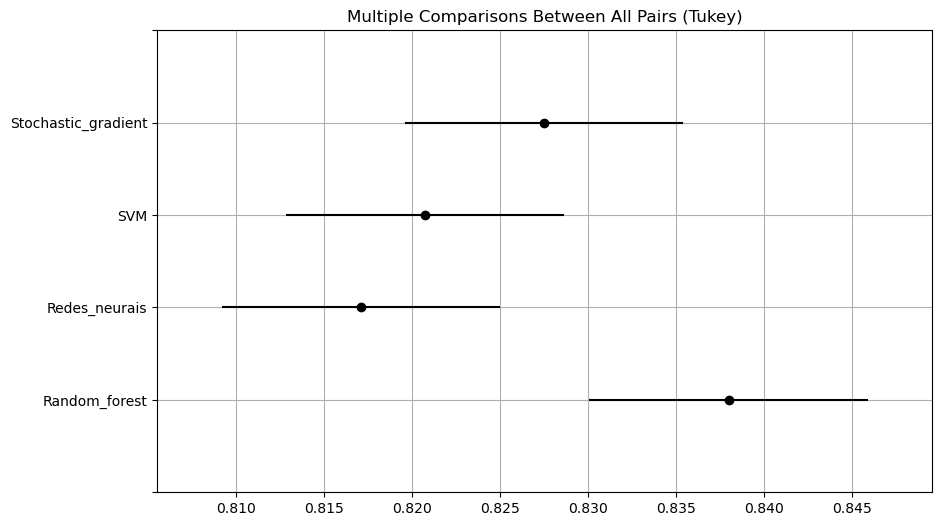

In [404]:
from statsmodels.stats.multicomp import MultiComparison

# 'melt' do pandas para fundir as colunas em uma única coluna 'Valores'
df_melted = pd.melt(resultados_cross, var_name='Algoritmos', value_name='Medias')

# Criando um objeto MultiComparison com os valores e os grupos
compara_grupos = MultiComparison(df_melted['Medias'], df_melted['Algoritmos'])

# Realizando o teste de comparação múltipla (método Tukey)
teste = compara_grupos.tukeyhsd()

print(teste)
teste.plot_simultaneous()
plt.grid()
plt.show()

* Vimos que o melhor modelo foi o Random Forest

## Otimizando o modelo (Tunnnig dos Parametros)

In [52]:
def get_tunning_params(algoritmo, random_or_grid, param, X_train, y_train, X_test, y_test):
    from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, KFold
    
    kfold = KFold(n_splits=10, shuffle=True)
    if random_or_grid == 'random':
        model_random_search = RandomizedSearchCV(estimator=algoritmo, param_distributions=param,
                                                 n_iter=10, cv=kfold, scoring='accuracy')
        model_random_search.fit(X_train, y_train)

        best_model = model_random_search.best_estimator_
        accuracy = best_model.score(X_test, y_test)
        print(f"Acurácia do Melhor Modelo: {accuracy:.4f}")
        return accuracy, best_model
    
    if random_or_grid == 'grid':
        model_grid_search = GridSearchCV(estimator=algoritmo, param_grid=param, scoring='accuracy', cv=10)
        model_grid_search.fit(X_train, y_train)
        best_model = model_grid_search.best_estimator_
        accuracy = best_model.score(X_test, y_test)
        print(f"Acurácia do Melhor Modelo: {accuracy:.4f}")
        return accuracy, best_model

### RandomizedSearchCV

In [53]:
# RandomForestClassifier
parametros = {'n_estimators': range(100, 200, 10), 'criterion': ['gini', 'entropy'],
              'min_samples_split': range(2, 12, 2), 'min_samples_leaf': range(2,20,2)}

acuracia, best_model = get_tunning_params(model_random,'random', parametros, X_treino_norm, y_treino_norm, X_teste_norm, y_teste_norm)

Acurácia do Melhor Modelo: 0.8333


In [54]:
best_model

RandomForestClassifier(criterion='entropy', min_samples_leaf=4,
                       min_samples_split=10, n_estimators=130)

### GridSearchCV

In [55]:
parametros = {'min_samples_leaf': [2,4,6], 'min_samples_split': [8], 'n_estimators': [100,110,120],
             'criterion': ['gini', 'entropy']}

acuracia, best_model = get_tunning_params(model_random, 'grid', parametros,
                                          X_treino_norm, y_treino_norm, X_teste_norm, y_teste_norm)

Acurácia do Melhor Modelo: 0.8382


In [56]:
best_model

RandomForestClassifier(criterion='entropy', min_samples_leaf=2,
                       min_samples_split=8)

In [57]:
acuracia

0.8381642512077294

In [58]:
best_model_random = best_model
best_model_random.fit(X_norm, y_smote)

RandomForestClassifier(criterion='entropy', min_samples_leaf=2,
                       min_samples_split=8)

## Salvando o Modelo Final

In [60]:
import pickle

arquivo = './models/model_random_forest_novexus_churn.pkl'
with open(arquivo, 'wb') as file:
    pickle.dump(best_model_random, file)
    
arquivo_scaler = './models/scaler_random_forest_novexus_churn.pkl'
with open(arquivo_scaler, 'wb') as file:
    pickle.dump(scaler, file)

## Carregando o Modelo Final

In [61]:
url_arquivo = './model_random_forest_novexus_churn.pkl'
url_arquivo_scaler = './scaler_random_forest_novexus_churn.pkl'

with open(url_arquivo, 'rb') as file:
    modelo_final = pickle.load(file)
    
with open(url_arquivo_scaler, 'rb') as file:
    scaler_final = pickle.load(file)

In [62]:
def previsao_novo_dado(dados):
    dados_norm = scaler_final.transform(dados)
    previsao = modelo_final.predict(dados_norm)[0]
    if previsao == 0:
        print('Previsão de \033[31mNÃO\033[0m continuar como cliente!')
    else:
        print('Previsão de \033[34mCONTINUAR\033[0m como cliente!')

In [63]:
novos_dados = dados_ml.iloc[0:1, :-1]

previsao_novo_dado(novos_dados)

Previsão de NÃO continuar como cliente!


In [2]:
dados_ml = pd.read_csv('./datasets/base_dados_nevexus_ml.csv')

In [3]:
dados_ml.iloc[0:1, :-1].values

array([[  0. ,   9. ,  65.6, 593.3,   0. ,   1. ,   1. ,   1. ,   0. ,
          0. ,   0. ,   0. ,   1. ,   0. ,   1. ,   1. ,   0. ,   0. ,
          0. ,   1. ,   1. ,   0. ,   0. ]])

In [ ]:
{
    "Idoso" : 0,
    "Contrato_Ativo": 9,
    "Valor_Mensal": 65.6,
    "Valor_Total": 593.3, 
    "Genero": 0,
    "Conjuge": 1,
    "Dependentes": 1,
    "Servico_Telefone": 1, 
    "Mult_Linhas": 0,
    "Servico_Internet_Fibra Otica":0, 
    "Servico_Internet": 0, 
    "Seguranca_Online":0,
    "Backup_Online":1, 
    "Protecao_Disp":0, 
    "Suporte_Tecnico":1, 
    "Stream_Tv":1,
    "Stream_Filmes":0, 
    "Contrato_Dois anos":0, 
    "Contrato_Mensal":0,
    "Fatura_Online":1, 
    "Forma_Pagamento_Correio":1,
    "Forma_Pagamento_Pag. Eletronico":0,
    "Forma_Pagamento_Transf. Aut.":0
}

In [64]:
dados_ml

,Idoso,Contrato_Ativo,Valor_Mensal,Valor_Total,Genero,Conjuge,Dependentes,Servico_Telefone,Mult_Linhas,Servico_Internet_Fibra Otica,Servico_Internet,Seguranca_Online,Backup_Online,Protecao_Disp,Suporte_Tecnico,Stream_Tv,Stream_Filmes,Contrato_Dois anos,Contrato_Mensal,Fatura_Online,Forma_Pagamento_Correio,Forma_Pagamento_Pag. Eletronico,Forma_Pagamento_Transf. Aut.,Churn
0,0,9,65.60,593.30,0,1,1,1,0,0,0,0,1,0,1,1,0,0,0,1,1,0,0,0
1,0,9,59.90,542.40,1,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0
2,0,4,73.90,280.85,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,1,0,1,0,1
3,1,13,98.00,1237.85,1,1,0,1,0,1,0,0,1,1,0,1,1,0,1,1,0,1,0,1
4,1,3,83.90,267.40,0,1,0,1,0,1,0,0,0,0,1,1,0,0,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,13,55.15,742.90,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0
7039,0,22,85.10,1873.70,1,1,0,1,1,1,0,0,0,0,0,0,1,0,1,1,0,1,0,1
7040,0,2,50.30,92.75,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0
7041,0,67,67.85,4627.65,1,1,1,1,0,0,0,1,0,1,1,0,1,1,0,0,1,0,0,0


In [8]:
dados_ml.iloc[3:4, :-1]

,Idoso,Contrato_Ativo,Valor_Mensal,Valor_Total,Genero,Conjuge,Dependentes,Servico_Telefone,Mult_Linhas,Servico_Internet_Fibra Otica,Servico_Internet,Seguranca_Online,Backup_Online,Protecao_Disp,Suporte_Tecnico,Stream_Tv,Stream_Filmes,Contrato_Dois anos,Contrato_Mensal,Fatura_Online,Forma_Pagamento_Correio,Forma_Pagamento_Pag. Eletronico,Forma_Pagamento_Transf. Aut.
3,1,13,98.0,1237.85,1,1,0,1,0,1,0,0,1,1,0,1,1,0,1,1,0,1,0


In [ ]:
{
    "Idoso" : 1,
    "Contrato_Ativo": 13,
    "Valor_Mensal": 98.0,
    "Valor_Total": 1237.85, 
    "Genero": 1,
    "Conjuge": 1,
    "Dependentes": 0,
    "Servico_Telefone": 1, 
    "Mult_Linhas": 0,
    "Servico_Internet_Fibra Otica":1, 
    "Servico_Internet": 0, 
    "Seguranca_Online": 0,
    "Backup_Online": 1, 
    "Protecao_Disp": 1, 
    "Suporte_Tecnico": 0, 
    "Stream_Tv": 1,
    "Stream_Filmes": 1, 
    "Contrato_Dois anos": 0, 
    "Contrato_Mensal": 1,
    "Fatura_Online": 1, 
    "Forma_Pagamento_Correio": 0,
    "Forma_Pagamento_Pag. Eletronico": 1,
    "Forma_Pagamento_Transf. Aut.":0
}